Курсовой проект для курса "Python для Data Science"
Материалы к проекту (файлы): train.csv test.csv
Задание: Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.
Целевая переменная: Price
Основная метрика: R2 - коэффициент детерминации (sklearn.metrics.r2_score)
Вспомогательная метрика: MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)
Сдача проекта:
Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту") ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook с расширением ipynb).
Приложить файл с названием по образцу SShirkin_predictions.csv с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
Сроки сдачи: Сдать проект за 72 часа до начала Урока 13 ("Вебинар. Результаты итоговых проектов и закрытие курса").
Примечание: Все файлы csv должны содержать названия полей (header - то есть "шапку"), разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

df= pd.read_csv('train.csv')

df.head(3)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524

In [2]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [3]:
#df.loc[(df['DistrictId'] == 53) & (df['Square'] <25)]

In [4]:
#df.loc[(df['DistrictId'] == 53)]

In [5]:
df.loc[(df['DistrictId'] == 45) & (df['Rooms'] == 1) & (df['Square'] < 30)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5251  12645          45    1.0  29.412001   15.915694            5.0      4   
9294   6782          45    1.0   2.954309    5.257278            1.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
5251         5.0       1967   0.014423         B         B        19   
9294         1.0       1977   0.195781         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
5251      3806         4           NaN            0        3       B   
9294      5212         6           NaN            3        2       B   

              Price  
5251  150888.311763  
9294  438005.182323

In [6]:
df.loc[(df['DistrictId'] == 45) & (df['Rooms'] == 1) & (df['Square'] > 30)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
119     367          45    1.0  42.367289   40.012529            1.0     16   
226    4180          45    1.0  40.371077         NaN            1.0     21   
477    8849          45    1.0  63.419553    2.286357            1.0      3   
1030   2383          45    1.0  38.729199   20.025772            9.0      4   
1102   7142          45    1.0  40.357831   42.115983            1.0      4   
1365  11091          45    1.0  40.676738   21.977310            6.0      5   
1792  15463          45    1.0  34.246623   21.693643            5.0      3   
2040  10002          45    1.0  42.451660   19.611278            9.0      9   
2115    328          45    1.0  42.713308         NaN            0.0      5   
2277  13148          45    1.0  42.725818   39.112915            1.0     14   
2468   1608          45    1.0  42.583454         NaN            1.0     21   
2590  11771          45    1.0  38.467276   39.624493            1.0     11   
3323  15704          45    1.0  42.768644   42.674844            1.0     27   
3888  15278          45    1.0  50.214616   50.759533            1.0     11   
4587  12354          45    1.0  50.568359         NaN            1.0     14   
4875   1140          45    1.0  40.178189   19.442492            9.0     10   
5175   5370          45    1.0  43.520740   19.573338            9.0      6   
5669   1796          45    1.0  41.323212   42.388252            1.0     24   
6144  14179          45    1.0  42.745306         NaN            0.0     17   
6246   5920          45    1.0  30.527946   17.349533            5.0      5   
6270   2594          45    1.0  56.421113   54.129248            1.0     24   
6839  10536          45    1.0  41.580054         NaN           10.0     11   
7530  13143          45    1.0  39.631442   21.409164            9.0      6   
8159   3903          45    1.0  42.628020   21.676523            8.0      6   
8514  11565          45    1.0  41.380223         NaN            0.0     10   
8654   3710          45    1.0  42.311770         NaN            1.0     17   
8789   5613          45    1.0  41.596136   41.385560            1.0     14   
8830   9465          45    1.0  35.516744   20.582687            5.0      2   
9177  13951          45    1.0  39.225914    2.372105            1.0     24   
9236   2379          45    1.0  50.769111         NaN            1.0     16   
9270   6665          45    1.0  34.415882   21.895415            9.0      3   
9443   4051          45    1.0  40.389102   23.441835            6.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
119         14.0       2015   0.195781         B         B        23   
226         22.0       2016   0.195781         B         B        23   
477          1.0       1977   0.195781         B         B        23   
1030        12.0       1968   0.195781         B         B        23   
1102        17.0       1977   0.195781         B         B        23   
1365         5.0       1958   0.014423         B         B        19   
1792         5.0       1961   0.014423         B         B        19   
2040        17.0       1977   0.195781         B         B        23   
2115         0.0       1977   0.195781         B         B        23   
2277         1.0       2013   0.195781         B         B        23   
2468         1.0       2015   0.195781         B         B        23   
2590         9.0       1977   0.195781         B         B        23   
3323        25.0       2016   0.195781         B         B        23   
3888        22.0       1977   0.195781         B         B        23   
4587        22.0       1977   0.195781         B         B        23   
4875        12.0       1968   0.014423         B         B        19   
5175        16.0       1977   0.195781         B         B        23   
5669        23.0       2017   0.195781         B         B        23   
6144         0.0       1977   0.1

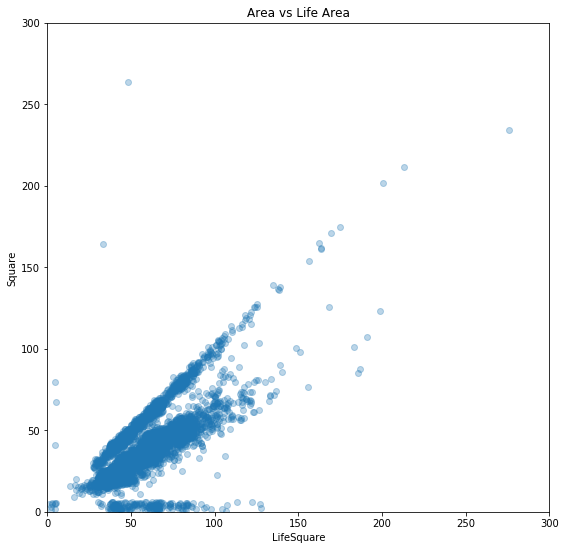

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Square,df.LifeSquare, alpha = 0.3, cmap = 'Paired') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Area vs Life Area")
plt.xlabel('LifeSquare')
plt.ylabel('Square')

plt.ylim(0, 300)
plt.xlim(0,300)

plt.savefig('Area_vs_LifeArea_original.png')

In [8]:
#19 rooms - strange , lets check.
df.loc[df['Rooms'] == 19]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1454  8491           1   19.0  42.006046   21.779288            7.0     17   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1454        17.0       2014   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1454       264         0           NaN            0        1       B   

             Price  
1454  78364.616704

In [9]:
# square - 42 m^2, can't have 19 rooms, let's see if district 1 and year (2014) is frequent enough, and if yes, see whats common there, if not than drop it

In [10]:
df[df['DistrictId']==1].loc[df['HouseYear'] == 2014]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
101    3973           1    2.0  62.969903   31.745611           10.0     14   
1454   8491           1   19.0  42.006046   21.779288            7.0     17   
1833  12532           1    3.0  76.481158   76.773330           10.0     14   
3616   1635           1    2.0  65.750084   64.812913            9.0     12   
3730  12049           1    2.0  61.541353    1.242250            1.0     20   
3736   6596           1    1.0  41.314644   19.422512           11.0      4   
3805   6087           1    1.0  58.364001         NaN            1.0     16   
6567   2403           1    1.0  40.329174   21.910158            9.0     15   
7186  11483           1    1.0  48.133815         NaN            1.0      7   
7788   5483           1    2.0  68.183079   34.763695           12.0     16   
8526  12933           1    3.0  77.803651   44.177136           12.0      9   
9034   6544           1    2.0  58.548703   30.455447            9.0     18   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
101         14.0       2014   0.007122         B         B         1   
1454        17.0       2014   0.007122         B         B         1   
1833        22.0       2014   0.007122         B         B         1   
3616        17.0       2014   0.007122         B         B         1   
3730        22.0       2014   0.007122         B         B         1   
3736         5.0       2014   0.025609         B         B        33   
3805         1.0       2014   0.007122         B         B         1   
6567        17.0       2014   0.007122         B         B         1   
7186        20.0       2014   0.007122         B         B         1   
7788        17.0       2014   0.007122         B         B         1   
8526        17.0       2014   0.007122         B         B         1   
9034        17.0       2014   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
101        264         0           NaN            0        1       B   
1454       264         0           NaN            0        1       B   
1833       264         0           NaN            0        1       B   
3616       264         0           NaN            0        1       B   
3730       264         0           NaN            0        1       B   
3736      5261         0         240.0            3        1       B   
3805       264         0           NaN            0        1       B   
6567       264         0           NaN            0        1       B   
7186       264         0           NaN            0        1       B   
7788       264         0           NaN            0        1       B   
8526       264         0           NaN            0        1       B   
9034       264         0           NaN            0        1       B   

              Price  
101    92127.061788  
1454   78364.616704  
1833  234015.738537  
3616  181074.511775  
3730  206168.319222  
3736  142334.964172  
3805  180926.585792  
6567  148273.578148  
7186  180099.659745  
7788  137177.199968  
8526  126088.404818  
9034   88494.483887

In [11]:
# ok. looks like typo. seems like it should have 1 room only. 

In [12]:
df.loc[df['Rooms'] == 19, ['Rooms']] = 1

In [13]:
df.loc[df['Id'] == 8491]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1454  8491           1    1.0  42.006046   21.779288            7.0     17   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1454        17.0       2014   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1454       264         0           NaN            0        1       B   

             Price  
1454  78364.616704

In [14]:
# cleaned

In [15]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.315775    37.199645   
std     4859.01902     43.587592      0.821937     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     10.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [16]:
# let's see if rooms = 0 makes sense
df.loc[df['Rooms'] == 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1397  12638          27    0.0  138.427694  136.215499            0.0      4   
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
2269   7317          27    0.0   41.790881         NaN            0.0     13   
3911    770          28    0.0   49.483501         NaN            0.0     16   
4366    456           6    0.0   81.491446         NaN            0.0      4   
4853   3224          27    0.0    2.377248    0.873147            0.0      1   
6149   3159          88    0.0   38.697117   19.345131            9.0      9   
8834   9443          27    0.0   87.762616   85.125471            0.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1397         3.0       2016   0.075424         B         B        11   
1981         3.0       2008   0.211401         B         B         9   
2269         0.0       1977   0.211401         B         B         9   
3911         0.0       2015   0.118537         B         B        30   
4366         0.0       1977   0.243205         B         B         5   
4853         0.0       1977   0.017647         B         B         2   
6149        16.0       1982   0.127376         B         B        43   
8834        15.0       1977   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1397      3097         0           NaN            0        0       B   
1981      1892         0           NaN            0        1       B   
2269      1892         0           NaN            0        1       B   
3911      6207         1        1183.0            1        0       B   
4366      1564         0         540.0            0        0       B   
4853       469         0           NaN            0        0       B   
6149      8429         3           NaN            3        9       B   
8834      1892         0           NaN            0        1       B   

              Price  
1397  268394.744389  
1981  302211.260887  
2269   98129.976788  
3911  217009.338463  
4366  212864.799112  
4853  126596.941798  
6149  158998.110646  
8834  219281.918007

## issue 1
there seems to be an issue with apts with 0 rooms. keep in mind for now!!!

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

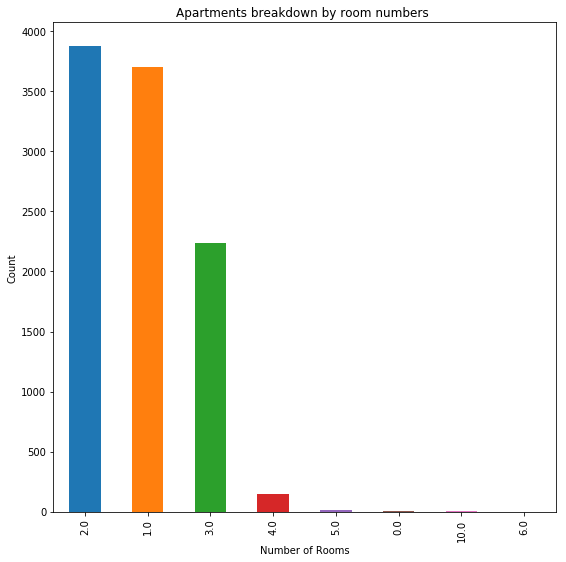

In [17]:
# visual analysis
df['Rooms'].value_counts().plot(kind='bar')
plt.title('Apartments breakdown by room numbers ')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
sns.despine

Text(0,0.5,'Price')

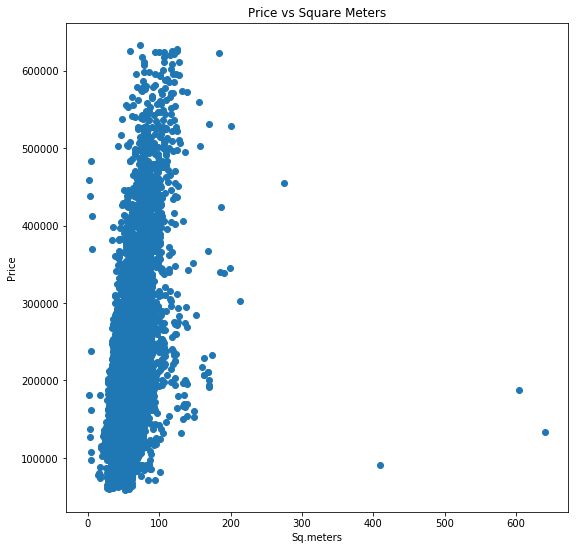

In [18]:
plt.scatter(df.Square, df.Price) #plt.scatter(x, y....)
plt.title("Price vs Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

Text(0,0.5,'Square')

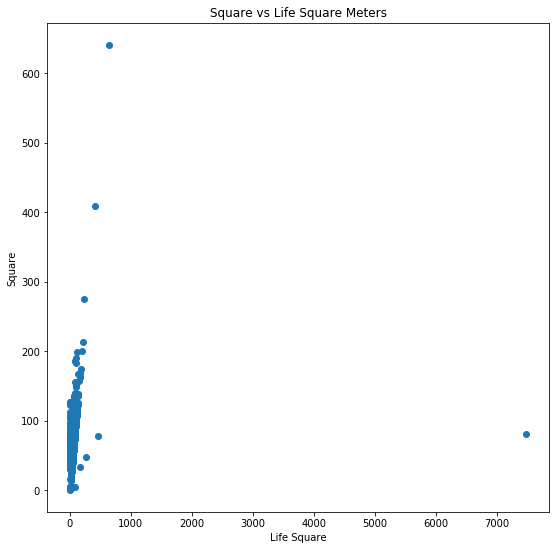

In [19]:
plt.scatter(df.LifeSquare, df.Square) #plt.scatter(x, y....)
plt.title("Square vs Life Square Meters")
plt.xlabel('Life Square')
plt.ylabel('Square')

In [20]:
# issue with life square - outlier. need to check

In [21]:
df.loc[(df['Square'] - df['LifeSquare']) < 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
28     8054          23    1.0   42.530043   43.967759            1.0      3   
44    10521          38    3.0  104.211396  106.340403            0.0     20   
52     2301           1    2.0   61.400054   65.224603            0.0     17   
123    8753          25    3.0   85.952306   89.803753            1.0      4   
153    9870          62    1.0   51.831473   53.491301            1.0      5   
178    2416          57    1.0   29.298168   29.770784            5.0      7   
184    3398          74    1.0   48.743665   51.011232            1.0     12   
212    1748          88    2.0    5.497061   67.628717            1.0     24   
217    5540          27    3.0   57.643613   59.425078            9.0     16   
234   12633          27    3.0   81.867166   81.884548            0.0     12   
236    3916           1    1.0   43.084413   47.071617            1.0      9   
237    3851          52    2.0   65.388475   66.591815            1.0     13   
271    7674          30    2.0   51.283020   51.575295            1.0      5   
315   14899          27    1.0   37.370830   39.184607            1.0     25   
342    7815           6    1.0   74.609609   78.533293            1.0     16   
343     716         113    3.0  125.287183  127.477137           19.0     26   
358    6006          62    3.0  121.844004  122.497641            1.0      3   
369      61           1    1.0   54.307727   55.926217            1.0      4   
378   15443           1    1.0   37.885188   40.313322           10.0     12   
379    8104          52    1.0   37.496336   38.964704           10.0      7   
392   15246           1    2.0   64.067854   65.081193            1.0     12   
401    2123          58    3.0   93.905616   94.958481            1.0      3   
478   10391          62    1.0   37.498161   40.371530            1.0     21   
495   10071          27    2.0   34.665783   36.079447            9.0      3   
498   12796           6    1.0   59.816412   60.823136            1.0     24   
506    9552          23    1.0  105.432181  106.178175            0.0      3   
544    2467          23    3.0   63.837671   64.300575            1.0      4   
554    5738          52    2.0   66.795666   67.051654            1.0      3   
561   11692         113    2.0   70.566571   70.694221           12.0     28   
574   14211          48    1.0   39.357596   40.015989            1.0     21   
...     ...         ...    ...         ...         ...            ...    ...   
9476  13789          23    1.0   29.289544   30.492156            0.0      3   
9484  10374          54    2.0   78.061116   82.171479            1.0     10   
9492   5367           1    3.0   81.227389   81.655818            0.0     14   
9582   3414           6    2.0   60.913076   63.262528            1.0      3   
9584   8403           9    2.0   56.690554   56.917296            1.0      8   
9589  16638          38    1.0  106.260300  109.246660            1.0      4   
9594   7113          62    1.0   43.906426   44.082779            1.0     13   
9595   7249           6    3.0   73.171947   74.858927            1.0      7   
9597    833          27    1.0   44.260288   45.602761           10.0      3   
9613   7657          38    1.0    4.502784    4.618547            1.0     28   
9626   3742           1    1.0   53.258610   56.655126            0.0      6   
9630  10021          27    1.0   41.755282   41.857484            1.0     13   
9646   6996          23    2.0   53.054415   54.677693            1.0      3   
9681     47           2    2.0   45.053898   47.329346            5.0      2   
9707  12302          30    1.0   46.072913   48.307844            0.0      4   
9721    396          54    3.0  110.119100  110.333763            1.0      8   
9742   9941          46    3.0   64.642890   66.400030            6.0      6   
9772   6968           6    3.0   74.505045   75.735479            1.0     15   
9793   57

In [22]:
# seems like apt with Id 1748 has type should be 10 times bigger
df.loc[df['Id'] == 1748, ['Square']] = df.loc[df['Id'] == 1748, ['Square']]*10

In [23]:
df.loc[df['Id'] == 1748]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212  1748          88    2.0  54.970614   67.628717            1.0     24   

     HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
212        22.0       1977   0.127376         B         B        43      8429   

     Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
212         3           NaN            3        9       B  412511.088764

In [24]:
df.loc[(df['Square'] - df['LifeSquare']) < 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
28     8054          23    1.0   42.530043   43.967759            1.0      3   
44    10521          38    3.0  104.211396  106.340403            0.0     20   
52     2301           1    2.0   61.400054   65.224603            0.0     17   
123    8753          25    3.0   85.952306   89.803753            1.0      4   
153    9870          62    1.0   51.831473   53.491301            1.0      5   
178    2416          57    1.0   29.298168   29.770784            5.0      7   
184    3398          74    1.0   48.743665   51.011232            1.0     12   
212    1748          88    2.0   54.970614   67.628717            1.0     24   
217    5540          27    3.0   57.643613   59.425078            9.0     16   
234   12633          27    3.0   81.867166   81.884548            0.0     12   
236    3916           1    1.0   43.084413   47.071617            1.0      9   
237    3851          52    2.0   65.388475   66.591815            1.0     13   
271    7674          30    2.0   51.283020   51.575295            1.0      5   
315   14899          27    1.0   37.370830   39.184607            1.0     25   
342    7815           6    1.0   74.609609   78.533293            1.0     16   
343     716         113    3.0  125.287183  127.477137           19.0     26   
358    6006          62    3.0  121.844004  122.497641            1.0      3   
369      61           1    1.0   54.307727   55.926217            1.0      4   
378   15443           1    1.0   37.885188   40.313322           10.0     12   
379    8104          52    1.0   37.496336   38.964704           10.0      7   
392   15246           1    2.0   64.067854   65.081193            1.0     12   
401    2123          58    3.0   93.905616   94.958481            1.0      3   
478   10391          62    1.0   37.498161   40.371530            1.0     21   
495   10071          27    2.0   34.665783   36.079447            9.0      3   
498   12796           6    1.0   59.816412   60.823136            1.0     24   
506    9552          23    1.0  105.432181  106.178175            0.0      3   
544    2467          23    3.0   63.837671   64.300575            1.0      4   
554    5738          52    2.0   66.795666   67.051654            1.0      3   
561   11692         113    2.0   70.566571   70.694221           12.0     28   
574   14211          48    1.0   39.357596   40.015989            1.0     21   
...     ...         ...    ...         ...         ...            ...    ...   
9476  13789          23    1.0   29.289544   30.492156            0.0      3   
9484  10374          54    2.0   78.061116   82.171479            1.0     10   
9492   5367           1    3.0   81.227389   81.655818            0.0     14   
9582   3414           6    2.0   60.913076   63.262528            1.0      3   
9584   8403           9    2.0   56.690554   56.917296            1.0      8   
9589  16638          38    1.0  106.260300  109.246660            1.0      4   
9594   7113          62    1.0   43.906426   44.082779            1.0     13   
9595   7249           6    3.0   73.171947   74.858927            1.0      7   
9597    833          27    1.0   44.260288   45.602761           10.0      3   
9613   7657          38    1.0    4.502784    4.618547            1.0     28   
9626   3742           1    1.0   53.258610   56.655126            0.0      6   
9630  10021          27    1.0   41.755282   41.857484            1.0     13   
9646   6996          23    2.0   53.054415   54.677693            1.0      3   
9681     47           2    2.0   45.053898   47.329346            5.0      2   
9707  12302          30    1.0   46.072913   48.307844            0.0      4   
9721    396          54    3.0  110.119100  110.333763            1.0      8   
9742   9941          46    3.0   64.642890   66.400030            6.0      6   
9772   6968           6    3.0   74.505045   75.735479            1.0     15   
9793   57

In [25]:
#now i want to swap places of the columns

In [26]:
df.Square.head()

0    47.981561
1    65.683640
2    44.947953
3    53.352981
4    39.649192
Name: Square, dtype: float64

In [27]:
df.Square, df.LifeSquare = np.where(df.Square < df.LifeSquare, [df.LifeSquare, df.Square], [df.Square, df.LifeSquare])

In [28]:

df.loc[df['Id'] == 8054]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
28  8054          23    1.0  43.967759   42.530043            1.0      3   

    HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
28         9.0       2014   0.034656         B         B         0       168   

    Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2         Price  
28         0           NaN            0        0       B  95338.198549

In [29]:
id_list = 6006,61,3851,8054
df.loc[df['Id'] == 61]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
369  61           1    1.0  55.926217   54.307727            1.0      4   

     HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
369         1.0       2017   0.007122         B         B         1       264   

     Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
369         0           NaN            0        1       B  170313.288861

Text(0,0.5,'Square')

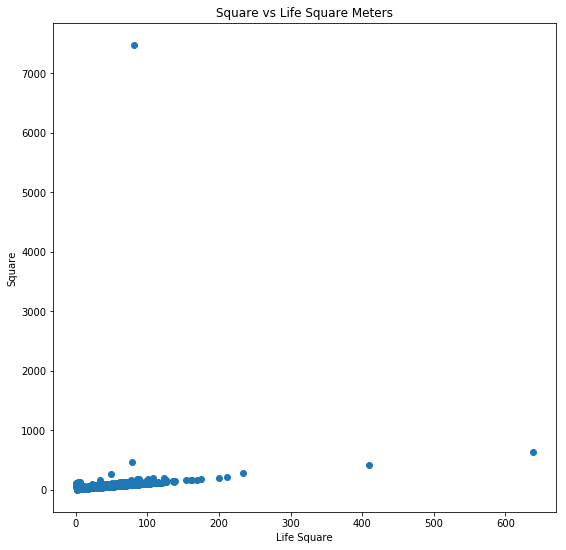

In [30]:
# now same plot to catch outlier, it must have jumped into square

plt.scatter(df.LifeSquare, df.Square) #plt.scatter(x, y....)
plt.title("Square vs Life Square Meters")
plt.xlabel('Life Square')
plt.ylabel('Square')

In [31]:

df.loc[df['Square'] > 7000]

Id  DistrictId  Rooms       Square  LifeSquare  KitchenSquare  Floor  \
4328  16550          27    3.0  7480.592129   81.694417            1.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4328        17.0       2016   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4328       469         0           NaN            0        0       B   

              Price  
4328  217357.492366

In [32]:
df.loc[df['Square'] > 7000, ['Square']] = df.loc[df['Square'] > 7000, ['Square']]/100

In [33]:
df.loc[df['Square'] > 7000]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [34]:
df.loc[df['Id'] == 16550]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4328  16550          27    3.0  74.805921   81.694417            1.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4328        17.0       2016   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4328       469         0           NaN            0        0       B   

              Price  
4328  217357.492366

Text(0,0.5,'Square')

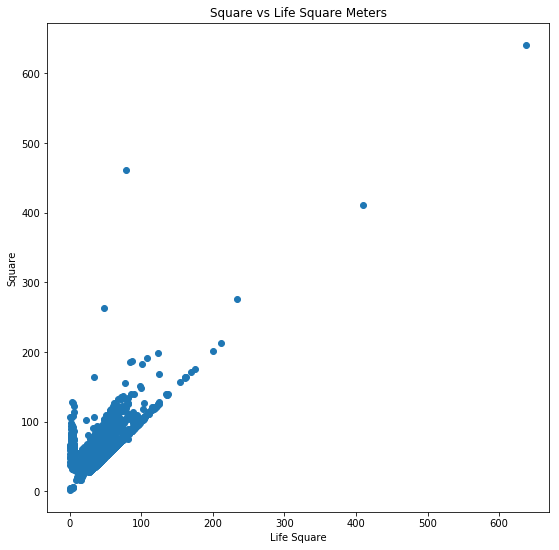

In [35]:
# now same plot for QC

plt.scatter(df.LifeSquare, df.Square) #plt.scatter(x, y....)
plt.title("Square vs Life Square Meters")
plt.xlabel('Life Square')
plt.ylabel('Square')

In [36]:
df.loc[df['Square']>400]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
4262     28           9    2.0  604.705972         NaN            1.0     17   
4690   2307         102    1.0  410.639749  409.425181           10.0      4   
6977  11602          30    2.0  641.065193  638.163193           10.0     20   
8437  15886          85    3.0  461.463614   78.059331           10.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4262        18.0       1977   0.161532         B         B        25   
4690         4.0       2016   0.238617         B         B        26   
6977        19.0       2019   0.000078         B         B        22   
8437        16.0       1998   0.037178         B         B        52   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4262      5648         1          30.0            2        4       B   
4690      3889         6         705.0            3        6       B   
6977      6398       141        1046.0            3       23       B   
8437     11217         1        2300.0            1        7       B   

              Price  
4262  187717.242538  
4690   90470.430830  
6977  133529.681562  
8437  394253.299978

In [37]:
#since kitchen is only 10m ...in 400,600+ apt...seems strange. will divide those by 10 for kitchen and lifesquare both

df.Square, df.LifeSquare = np.where(df.Square > 400, [df.Square/10, df.LifeSquare/10], [df.Square, df.LifeSquare])



In [38]:
df.loc[df['Id']==28]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4262  28           9    2.0  60.470597         NaN            1.0     17   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4262        18.0       1977   0.161532         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4262      5648         1          30.0            2        4       B   

              Price  
4262  187717.242538

In [39]:
df.loc[df['Id']==2307]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4690  2307         102    1.0  41.063975   40.942518           10.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4690         4.0       2016   0.238617         B         B        26   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4690      3889         6         705.0            3        6       B   

            Price  
4690  90470.43083

In [40]:
df.loc[df['Id']==15886]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8437  15886          85    3.0  46.146361    7.805933           10.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8437        16.0       1998   0.037178         B         B        52   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8437     11217         1        2300.0            1        7       B   

              Price  
8437  394253.299978

In [41]:
#weird number for lifesquare after division, but it was weird before anyway. just put an arbitrary number, based on what we see above
df.loc[df['Id']==15886, 'LifeSquare'] = 45

In [42]:
df.loc[df['Id']==15886]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8437  15886          85    3.0  46.146361        45.0           10.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8437        16.0       1998   0.037178         B         B        52   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8437     11217         1        2300.0            1        7       B   

              Price  
8437  394253.299978

In [43]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.292297    35.931292   
std     4859.01902     43.587592      0.821937     19.283712    17.647641   
min        0.00000      0.000000      0.000000      2.377248     0.370619   
25%     4169.50000     20.000000      1.000000     41.865867    22.766009   
50%     8394.50000     36.000000      2.000000     52.619610    32.765469   
75%    12592.50000     75.000000      2.000000     65.985903    45.022567   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [44]:
#let's check houseyear

In [45]:
df['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [46]:
#ok...years that equal 0....or less than 1900...lets get rid of them

In [47]:
df.loc[df['HouseYear'] == 0]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [48]:
df.loc[df['HouseYear']== 4968]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4189  11607         147    2.0  44.791836   28.360393            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4189         9.0       4968   0.319809         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4189      4756        16        2857.0            5        8       B   

              Price  
4189  243028.603096

In [49]:
df.loc[df['HouseYear']== 4968, 'HouseYear'] = 1968

In [50]:
df.loc[df['HouseYear']== 20052011]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109    1.0  37.26507   20.239714            9.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497        12.0   20052011    0.13633         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1497      6141        10         262.0            3        6       B   

              Price  
1497  254084.534396

In [51]:
df.loc[df['DistrictId'] == 109]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
144   13759         109    1.0   40.117364   21.391898           10.0      5   
254    5756         109    2.0   53.078404   30.055048            9.0      3   
273    7765         109    1.0   31.123567   24.856298            5.0      8   
463   11521         109    1.0   43.975430   22.525571            8.0     16   
586     424         109    2.0   46.084526   28.946348            6.0      4   
1423    869         109    1.0   39.784653   21.849179            8.0      2   
1497  10814         109    1.0   37.265070   20.239714            9.0      9   
1553   3185         109    2.0   54.002829   33.414232            8.0     25   
1680   6352         109    4.0  100.904263   65.110698           10.0      8   
1896   1652         109    3.0   72.601948   41.214538            8.0     16   
1931   8868         109    1.0   36.730798   22.992771            5.0     10   
2247  16772         109    3.0   36.659413   32.795221            6.0      2   
2315   4598         109    1.0   39.729759   21.938368            8.0      8   
2472   8208         109    2.0   79.033736   40.069064           10.0     15   
2563  15762         109    3.0   76.746603   46.470198           10.0     15   
2797   5028         109    3.0   71.321363   46.455276           10.0     14   
3038  15956         109    2.0   62.388710   31.700385            9.0     14   
3243  15234         109    2.0   65.875102   36.837933           10.0     19   
4033   1188         109    3.0   79.933771   47.589140           10.0     18   
4163   1174         109    3.0   77.575504   41.635828           10.0      9   
4513  13867         109    2.0   49.235262   32.017011            5.0      4   
4517   2459         109    3.0   76.603972   49.855622           10.0      3   
4582   3593         109    3.0   64.991830   42.906286            8.0      8   
4983   2699         109    2.0   59.700180   34.538345           10.0      4   
5027   3074         109    2.0   61.636795   33.055403            9.0     10   
5165   7897         109    2.0   44.514341   28.068914            5.0      8   
5583  15571         109    3.0   62.464582   41.969035            8.0      9   
5774   8631         109    2.0   43.124938   29.556886            5.0      2   
5974   7092         109    2.0   44.963530   30.282286            5.0      2   
6018   9339         109    3.0   76.759563   45.416096           10.0     15   
6071   1742         109    2.0   51.992326   31.147560            7.0     15   
6549   8032         109    2.0   46.170364   30.425586            6.0      8   
7109  13629         109    3.0   77.084998   48.976989           10.0      8   
7192  13048         109    2.0   56.133208   32.540212            9.0     10   
7552   7480         109    2.0   43.225443   31.324272            6.0      4   
7822  14028         109    2.0   48.031089   34.081777            5.0      5   
7883  13508         109    1.0   45.144292   19.846351            9.0      8   
9248  11254         109    2.0   61.923965   38.851451           10.0     16   
9340  15129         109    4.0  117.750933   72.758793           10.0      5   
9809   8063         109    3.0   58.340120   44.598560            5.0      1   
9916  16712         109    2.0   58.139901   36.954603           10.0     14   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
144         22.0       1982   0.000000         B         B        25   
254         17.0       2002   0.136330         B         B        30   
273          9.0       1965   0.136330         B         B        30   
463         17.0       1999   0.136330         B         B        30   
586         10.0       1968   0.136330         B         B        30   
1423        17.0       1995   0.136330         B         B        30   
1497        12.0   20052011   0.136330         B         B        30   
1553        25.0       2011   0.136330         B         B        30   


In [52]:
#based on what houseyears i see in this district...lets change it to 2011
df.loc[df['HouseYear']== 20052011, 'HouseYear']=2011

In [53]:
df['HouseYear'].unique()

array([1969, 1978, 1968, 1977, 1976, 2011, 1960, 2014, 1973, 1959, 1999,
       1980, 1979, 1983, 2001, 2012, 2002, 1996, 1964, 2018, 1972, 1965,
       1984, 1961, 1971, 1963, 2017, 1970, 1981, 2003, 2016, 1991, 1975,
       2006, 2009, 1985, 1974, 1994, 2000, 1987, 1998, 2005, 1990, 1982,
       1997, 2015, 2008, 2010, 2004, 2007, 1967, 1957, 1962, 1993, 1966,
       1955, 1937, 1992, 1954, 1995, 2019, 1948, 1986, 2013, 1989, 1958,
       1938, 1956, 1988, 2020, 1951, 1952, 1935, 1914, 1932, 1950, 1917,
       1918, 1940, 1942, 1939, 1934, 1931, 1919, 1912, 1953, 1936, 1947,
       1929, 1930, 1933, 1941, 1916, 1910, 1928], dtype=int64)

Text(0,0.5,'Price')

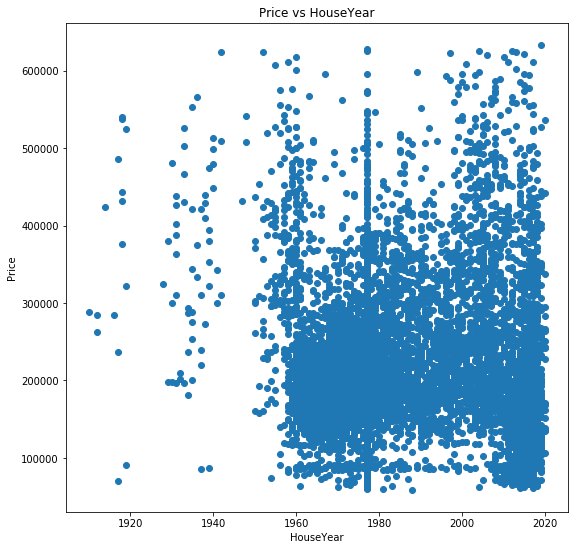

In [54]:
plt.scatter(df.HouseYear, df.Price) #plt.scatter(x, y....)
plt.title("Price vs HouseYear")
plt.xlabel('HouseYear')
plt.ylabel('Price')

Text(0,0.5,'Price')

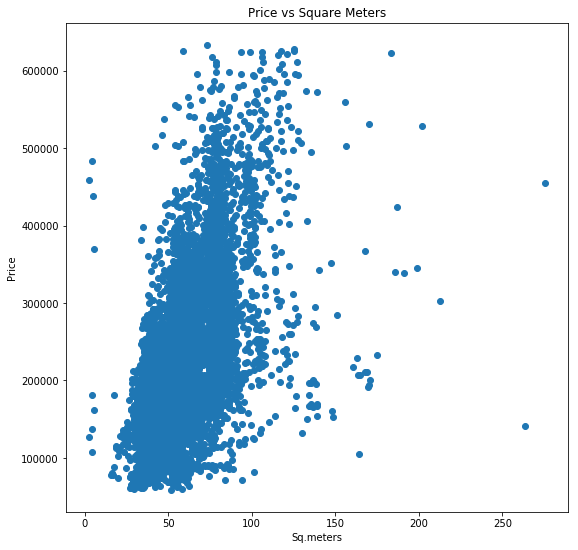

In [55]:
plt.scatter(df.Square, df.Price) #plt.scatter(x, y....)
plt.title("Price vs Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [56]:
# a clear trend in the data

Text(0,0.5,'Price')

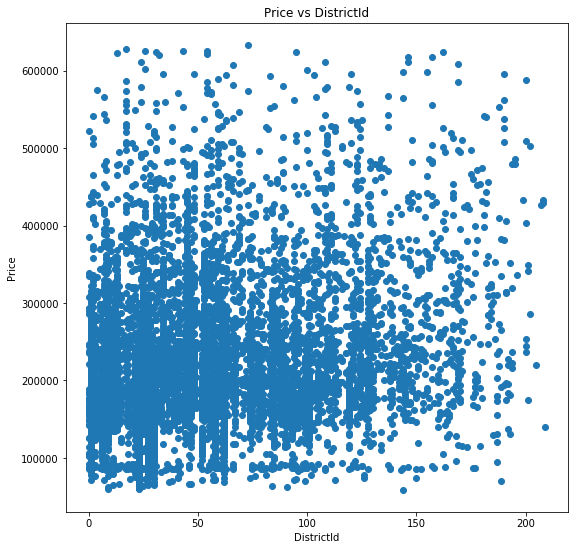

In [57]:
plt.scatter(df.DistrictId, df.Price) #plt.scatter(x, y....)
plt.title("Price vs DistrictId")
plt.xlabel('DistrictId')
plt.ylabel('Price')

In [58]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 9, 100

#df['DistrictId'].sort_values().plot(kind = 'barh')
#plt.show()

In [59]:
df['DistrictId'].nunique()

205

In [60]:
#data is mostly from certain district

In [61]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.292297    35.931292   
std     4859.01902     43.587592      0.821937     19.283712    17.647641   
min        0.00000      0.000000      0.000000      2.377248     0.370619   
25%     4169.50000     20.000000      1.000000     41.865867    22.766009   
50%     8394.50000     36.000000      2.000000     52.619610    32.765469   
75%    12592.50000     75.000000      2.000000     65.985903    45.022567   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        6.273300      8.526700     12.609400   1984.866300      0.118858   
std        28.560917      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max      2014.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

strange:
    KitchenSquare = 2014
    KitchenSquare = 0 or 1 (25% of data)
    HouseFloor = 117??? doublecheck but Floor max is 42...


In [62]:
df.loc[df['KitchenSquare']==2014]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1064  14656          62    1.0  47.100719    46.44796         2014.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1064         1.0       2014   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1064       629         1           NaN            0        0       A   

              Price  
1064  108337.484207

In [63]:
df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013)]


# df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
153    9870          62    1.0   53.491301   51.831473            1.0      5   
707    4345          62    1.0   49.275155    1.377284            1.0      5   
806    8332          62    1.0   44.729574   19.576604           11.0      5   
899    2236          62    1.0   40.264430         NaN            1.0      5   
1064  14656          62    1.0   47.100719   46.447960         2014.0      4   
1309    482          62    1.0   37.069613   15.565611           10.0      7   
1379  14339          62    1.0   49.302357   29.667367           11.0      9   
1810   3183          62    1.0   53.819412   50.420952            1.0      3   
2224   3746          62    1.0   46.722042    1.944446            1.0     11   
2371    474          62    1.0   45.621495   44.754844            1.0      6   
2731   1308          62    1.0   44.008402         NaN            1.0      3   
2926   4866          62    1.0   38.005975    1.549931            1.0     13   
2964   8138          62    1.0   42.529934   19.315713           11.0     10   
3144  10161          62    1.0   54.101323   52.981529           10.0      4   
3357   9600          62    1.0   55.911215   43.821379           10.0      6   
3485   7026          62    1.0   46.759316   44.019287            1.0      7   
3528   7370          62    1.0   49.172818         NaN            1.0      3   
4288  10874          62    1.0  136.727224         NaN            1.0      5   
4308   2061          62    1.0   55.588655   54.111524           10.0     10   
4362   8140          62    1.0   56.667328         NaN            1.0      3   
5055  10576          62    1.0   50.616681   48.965088            1.0     10   
5173   7722          62    1.0   45.586083         NaN           10.0     12   
5660   7377          62    1.0   44.904291   20.963609           11.0     18   
5701   8892          62    1.0   51.135512   49.298503            9.0      9   
5860   7882          62    1.0   45.573548   44.462279            0.0      4   
5961   4525          62    1.0   51.655282   18.872134           16.0     16   
6818   5990          62    1.0   45.581739   45.169427           10.0      8   
7480  10546          62    1.0   46.013187   43.417043           43.0      4   
7589  14703          62    1.0   46.254285   42.045992           10.0      7   
9024   4168          62    1.0   52.984021   51.280123           14.0      7   
9076  11267          62    1.0   43.696023   42.027177            1.0     14   
9186   6094          62    1.0   39.504184   37.590951           10.0     10   
9594   7113          62    1.0   44.082779   43.906426            1.0     13   
9919   6161          62    1.0   49.446118   26.943675           11.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
153          1.0       2015   0.072158         B         B         2   
707          1.0       2020   0.072158         B         B         2   
806          9.0       2016   0.072158         B         B         2   
899          1.0       2017   0.072158         B         B         2   
1064         1.0       2014   0.072158         B         B         2   
1309         9.0       2017   0.072158         B         B         2   
1379        17.0       2017   0.072158         B         B         2   
1810        17.0       2019   0.072158         B         B         2   
2224        12.0       2018   0.072158         B         B         2   
2371         1.0       2017   0.072158         B         B         2   
2731        12.0       2017   0.072158         B         B         2   
2926        15.0       2017   0.072158         B         B         2   
2964        14.0       2017   0.072158         B         B         2   
3144        17.0       2015   0.072158         B         B         2   
3357        17.0       2020   0.072158         B         B         2   
3485        12.0       2020   0.072158         B        

In [64]:
# u mnogi kitchen ==1 , nuka dostanem vse kitchen gde ne ravno 1...poluchim srednee i sdelaem tam gde 1 eto srednee. stranno chto kuhnya 1...eto uje obshaga kakayato

df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013) & (df['KitchenSquare']>1)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
806    8332          62    1.0  44.729574   19.576604           11.0      5   
1064  14656          62    1.0  47.100719   46.447960         2014.0      4   
1309    482          62    1.0  37.069613   15.565611           10.0      7   
1379  14339          62    1.0  49.302357   29.667367           11.0      9   
2964   8138          62    1.0  42.529934   19.315713           11.0     10   
3144  10161          62    1.0  54.101323   52.981529           10.0      4   
3357   9600          62    1.0  55.911215   43.821379           10.0      6   
4308   2061          62    1.0  55.588655   54.111524           10.0     10   
5173   7722          62    1.0  45.586083         NaN           10.0     12   
5660   7377          62    1.0  44.904291   20.963609           11.0     18   
5701   8892          62    1.0  51.135512   49.298503            9.0      9   
5961   4525          62    1.0  51.655282   18.872134           16.0     16   
6818   5990          62    1.0  45.581739   45.169427           10.0      8   
7480  10546          62    1.0  46.013187   43.417043           43.0      4   
7589  14703          62    1.0  46.254285   42.045992           10.0      7   
9024   4168          62    1.0  52.984021   51.280123           14.0      7   
9186   6094          62    1.0  39.504184   37.590951           10.0     10   
9919   6161          62    1.0  49.446118   26.943675           11.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
806          9.0       2016   0.072158         B         B         2   
1064         1.0       2014   0.072158         B         B         2   
1309         9.0       2017   0.072158         B         B         2   
1379        17.0       2017   0.072158         B         B         2   
2964        14.0       2017   0.072158         B         B         2   
3144        17.0       2015   0.072158         B         B         2   
3357        17.0       2020   0.072158         B         B         2   
4308        17.0       2015   0.072158         B         B         2   
5173        12.0       2019   0.072158         B         B         2   
5660        17.0       2015   0.072158         B         B         2   
5701        12.0       2020   0.072158         B         B         2   
5961        17.0       2015   0.072158         B         B         2   
6818        17.0       2019   0.072158         B         B         2   
7480        17.0       2019   0.072158         B         B         2   
7589        15.0       2015   0.072158         B         B         2   
9024        12.0       2016   0.072158         B         B         2   
9186        17.0       2018   0.072158         B         B         2   
9919        17.0       2016   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
806        629         1           NaN            0        0       A   
1064       629         1           NaN            0        0       A   
1309       629         1           NaN            0        0       A   
1379       629         1           NaN            0        0       A   
2964       629         1           NaN            0        0       A   
3144       629         1           NaN            0        0       A   
3357       629         1           NaN            0        0       A   
4308       629         1           NaN            0        0       A   
5173       629         1           NaN            0        0       A   
5660       629         1           NaN            0        0       A   
5701       629         1           NaN            0        0       A   
5961       629         1           NaN            0        0       A   
6818       629         1           NaN            0        0       A   
7480       629         1           NaN            0        0       A   
7589       629         1           NaN            0       

In [65]:
df.drop?

In [66]:
# get KitchenSquareMEAN
#df.drop([0, 1])

mask = df.loc[df['KitchenSquare']>2013].index #remove kitchen=2014

KitchenSquare_MEAN = df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013) & (df['KitchenSquare']>1)]['KitchenSquare'].drop(mask).mean()
KitchenSquare_MEAN

12.764705882352942

In [67]:
# u kv s kitchen - 2014, pomenyaem na srednee
df.loc[df['Id']==14656, 'KitchenSquare'] = KitchenSquare_MEAN

In [68]:
#posmotrim chto tam s kuhnyami

df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013) & (df['KitchenSquare']>1)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
806    8332          62    1.0  44.729574   19.576604      11.000000      5   
1064  14656          62    1.0  47.100719   46.447960      12.764706      4   
1309    482          62    1.0  37.069613   15.565611      10.000000      7   
1379  14339          62    1.0  49.302357   29.667367      11.000000      9   
2964   8138          62    1.0  42.529934   19.315713      11.000000     10   
3144  10161          62    1.0  54.101323   52.981529      10.000000      4   
3357   9600          62    1.0  55.911215   43.821379      10.000000      6   
4308   2061          62    1.0  55.588655   54.111524      10.000000     10   
5173   7722          62    1.0  45.586083         NaN      10.000000     12   
5660   7377          62    1.0  44.904291   20.963609      11.000000     18   
5701   8892          62    1.0  51.135512   49.298503       9.000000      9   
5961   4525          62    1.0  51.655282   18.872134      16.000000     16   
6818   5990          62    1.0  45.581739   45.169427      10.000000      8   
7480  10546          62    1.0  46.013187   43.417043      43.000000      4   
7589  14703          62    1.0  46.254285   42.045992      10.000000      7   
9024   4168          62    1.0  52.984021   51.280123      14.000000      7   
9186   6094          62    1.0  39.504184   37.590951      10.000000     10   
9919   6161          62    1.0  49.446118   26.943675      11.000000      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
806          9.0       2016   0.072158         B         B         2   
1064         1.0       2014   0.072158         B         B         2   
1309         9.0       2017   0.072158         B         B         2   
1379        17.0       2017   0.072158         B         B         2   
2964        14.0       2017   0.072158         B         B         2   
3144        17.0       2015   0.072158         B         B         2   
3357        17.0       2020   0.072158         B         B         2   
4308        17.0       2015   0.072158         B         B         2   
5173        12.0       2019   0.072158         B         B         2   
5660        17.0       2015   0.072158         B         B         2   
5701        12.0       2020   0.072158         B         B         2   
5961        17.0       2015   0.072158         B         B         2   
6818        17.0       2019   0.072158         B         B         2   
7480        17.0       2019   0.072158         B         B         2   
7589        15.0       2015   0.072158         B         B         2   
9024        12.0       2016   0.072158         B         B         2   
9186        17.0       2018   0.072158         B         B         2   
9919        17.0       2016   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
806        629         1           NaN            0        0       A   
1064       629         1           NaN            0        0       A   
1309       629         1           NaN            0        0       A   
1379       629         1           NaN            0        0       A   
2964       629         1           NaN            0        0       A   
3144       629         1           NaN            0        0       A   
3357       629         1           NaN            0        0       A   
4308       629         1           NaN            0        0       A   
5173       629         1           NaN            0        0       A   
5660       629         1           NaN            0        0       A   
5701       629         1           NaN            0        0       A   
5961       629         1           NaN            0        0       A   
6818       629         1           NaN            0        0       A   
7480       629         1           NaN            0        0       A   
7589       629         1           NaN            0       

In [69]:
#nu teper so vsemi kuhnyami v etom raione
df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
153    9870          62    1.0   53.491301   51.831473       1.000000      5   
707    4345          62    1.0   49.275155    1.377284       1.000000      5   
806    8332          62    1.0   44.729574   19.576604      11.000000      5   
899    2236          62    1.0   40.264430         NaN       1.000000      5   
1064  14656          62    1.0   47.100719   46.447960      12.764706      4   
1309    482          62    1.0   37.069613   15.565611      10.000000      7   
1379  14339          62    1.0   49.302357   29.667367      11.000000      9   
1810   3183          62    1.0   53.819412   50.420952       1.000000      3   
2224   3746          62    1.0   46.722042    1.944446       1.000000     11   
2371    474          62    1.0   45.621495   44.754844       1.000000      6   
2731   1308          62    1.0   44.008402         NaN       1.000000      3   
2926   4866          62    1.0   38.005975    1.549931       1.000000     13   
2964   8138          62    1.0   42.529934   19.315713      11.000000     10   
3144  10161          62    1.0   54.101323   52.981529      10.000000      4   
3357   9600          62    1.0   55.911215   43.821379      10.000000      6   
3485   7026          62    1.0   46.759316   44.019287       1.000000      7   
3528   7370          62    1.0   49.172818         NaN       1.000000      3   
4288  10874          62    1.0  136.727224         NaN       1.000000      5   
4308   2061          62    1.0   55.588655   54.111524      10.000000     10   
4362   8140          62    1.0   56.667328         NaN       1.000000      3   
5055  10576          62    1.0   50.616681   48.965088       1.000000     10   
5173   7722          62    1.0   45.586083         NaN      10.000000     12   
5660   7377          62    1.0   44.904291   20.963609      11.000000     18   
5701   8892          62    1.0   51.135512   49.298503       9.000000      9   
5860   7882          62    1.0   45.573548   44.462279       0.000000      4   
5961   4525          62    1.0   51.655282   18.872134      16.000000     16   
6818   5990          62    1.0   45.581739   45.169427      10.000000      8   
7480  10546          62    1.0   46.013187   43.417043      43.000000      4   
7589  14703          62    1.0   46.254285   42.045992      10.000000      7   
9024   4168          62    1.0   52.984021   51.280123      14.000000      7   
9076  11267          62    1.0   43.696023   42.027177       1.000000     14   
9186   6094          62    1.0   39.504184   37.590951      10.000000     10   
9594   7113          62    1.0   44.082779   43.906426       1.000000     13   
9919   6161          62    1.0   49.446118   26.943675      11.000000      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
153          1.0       2015   0.072158         B         B         2   
707          1.0       2020   0.072158         B         B         2   
806          9.0       2016   0.072158         B         B         2   
899          1.0       2017   0.072158         B         B         2   
1064         1.0       2014   0.072158         B         B         2   
1309         9.0       2017   0.072158         B         B         2   
1379        17.0       2017   0.072158         B         B         2   
1810        17.0       2019   0.072158         B         B         2   
2224        12.0       2018   0.072158         B         B         2   
2371         1.0       2017   0.072158         B         B         2   
2731        12.0       2017   0.072158         B         B         2   
2926        15.0       2017   0.072158         B         B         2   
2964        14.0       2017   0.072158         B         B         2   
3144        17.0       2015   0.072158         B         B         2   
3357        17.0       2020   0.072158         B         B         2   
3485        12.0       2020   0.072158         B        

In [70]:
df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013) & (df['KitchenSquare']<=1)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
153    9870          62    1.0   53.491301   51.831473            1.0      5   
707    4345          62    1.0   49.275155    1.377284            1.0      5   
899    2236          62    1.0   40.264430         NaN            1.0      5   
1810   3183          62    1.0   53.819412   50.420952            1.0      3   
2224   3746          62    1.0   46.722042    1.944446            1.0     11   
2371    474          62    1.0   45.621495   44.754844            1.0      6   
2731   1308          62    1.0   44.008402         NaN            1.0      3   
2926   4866          62    1.0   38.005975    1.549931            1.0     13   
3485   7026          62    1.0   46.759316   44.019287            1.0      7   
3528   7370          62    1.0   49.172818         NaN            1.0      3   
4288  10874          62    1.0  136.727224         NaN            1.0      5   
4362   8140          62    1.0   56.667328         NaN            1.0      3   
5055  10576          62    1.0   50.616681   48.965088            1.0     10   
5860   7882          62    1.0   45.573548   44.462279            0.0      4   
9076  11267          62    1.0   43.696023   42.027177            1.0     14   
9594   7113          62    1.0   44.082779   43.906426            1.0     13   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
153          1.0       2015   0.072158         B         B         2   
707          1.0       2020   0.072158         B         B         2   
899          1.0       2017   0.072158         B         B         2   
1810        17.0       2019   0.072158         B         B         2   
2224        12.0       2018   0.072158         B         B         2   
2371         1.0       2017   0.072158         B         B         2   
2731        12.0       2017   0.072158         B         B         2   
2926        15.0       2017   0.072158         B         B         2   
3485        12.0       2020   0.072158         B         B         2   
3528        17.0       2018   0.072158         B         B         2   
4288         3.0       2017   0.072158         B         B         2   
4362        18.0       2014   0.072158         B         B         2   
5055         1.0       2017   0.072158         B         B         2   
5860        17.0       2015   0.072158         B         B         2   
9076        17.0       2017   0.072158         B         B         2   
9594        12.0       2017   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
153        629         1           NaN            0        0       A   
707        629         1           NaN            0        0       A   
899        629         1           NaN            0        0       A   
1810       629         1           NaN            0        0       A   
2224       629         1           NaN            0        0       A   
2371       629         1           NaN            0        0       A   
2731       629         1           NaN            0        0       A   
2926       629         1           NaN            0        0       A   
3485       629         1           NaN            0        0       A   
3528       629         1           NaN            0        0       A   
4288       629         1           NaN            0        0       A   
4362       629         1           NaN            0        0       A   
5055       629         1           NaN            0        0       A   
5860       629         1           NaN            0        0       A   
9076       629         1           NaN            0        0       A   
9594       629         1           NaN            0        0       A   

              Price  
153   131797.472284  
707   135353.885620  
899   104827.764484  
1810  139513.898259  
2224  133721.121715  
2371  124727.431199  
2731  124349.824728  
2926  107147.609125  


In [71]:
df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013) & (df['KitchenSquare']<=1), 'KitchenSquare']=KitchenSquare_MEAN

In [72]:
df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013) & (df['KitchenSquare']<=1)]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [73]:
df.loc[(df['DistrictId']==62) & (df['Rooms']==1) & (df['HouseYear']>2013)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
153    9870          62    1.0   53.491301   51.831473      12.764706      5   
707    4345          62    1.0   49.275155    1.377284      12.764706      5   
806    8332          62    1.0   44.729574   19.576604      11.000000      5   
899    2236          62    1.0   40.264430         NaN      12.764706      5   
1064  14656          62    1.0   47.100719   46.447960      12.764706      4   
1309    482          62    1.0   37.069613   15.565611      10.000000      7   
1379  14339          62    1.0   49.302357   29.667367      11.000000      9   
1810   3183          62    1.0   53.819412   50.420952      12.764706      3   
2224   3746          62    1.0   46.722042    1.944446      12.764706     11   
2371    474          62    1.0   45.621495   44.754844      12.764706      6   
2731   1308          62    1.0   44.008402         NaN      12.764706      3   
2926   4866          62    1.0   38.005975    1.549931      12.764706     13   
2964   8138          62    1.0   42.529934   19.315713      11.000000     10   
3144  10161          62    1.0   54.101323   52.981529      10.000000      4   
3357   9600          62    1.0   55.911215   43.821379      10.000000      6   
3485   7026          62    1.0   46.759316   44.019287      12.764706      7   
3528   7370          62    1.0   49.172818         NaN      12.764706      3   
4288  10874          62    1.0  136.727224         NaN      12.764706      5   
4308   2061          62    1.0   55.588655   54.111524      10.000000     10   
4362   8140          62    1.0   56.667328         NaN      12.764706      3   
5055  10576          62    1.0   50.616681   48.965088      12.764706     10   
5173   7722          62    1.0   45.586083         NaN      10.000000     12   
5660   7377          62    1.0   44.904291   20.963609      11.000000     18   
5701   8892          62    1.0   51.135512   49.298503       9.000000      9   
5860   7882          62    1.0   45.573548   44.462279      12.764706      4   
5961   4525          62    1.0   51.655282   18.872134      16.000000     16   
6818   5990          62    1.0   45.581739   45.169427      10.000000      8   
7480  10546          62    1.0   46.013187   43.417043      43.000000      4   
7589  14703          62    1.0   46.254285   42.045992      10.000000      7   
9024   4168          62    1.0   52.984021   51.280123      14.000000      7   
9076  11267          62    1.0   43.696023   42.027177      12.764706     14   
9186   6094          62    1.0   39.504184   37.590951      10.000000     10   
9594   7113          62    1.0   44.082779   43.906426      12.764706     13   
9919   6161          62    1.0   49.446118   26.943675      11.000000      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
153          1.0       2015   0.072158         B         B         2   
707          1.0       2020   0.072158         B         B         2   
806          9.0       2016   0.072158         B         B         2   
899          1.0       2017   0.072158         B         B         2   
1064         1.0       2014   0.072158         B         B         2   
1309         9.0       2017   0.072158         B         B         2   
1379        17.0       2017   0.072158         B         B         2   
1810        17.0       2019   0.072158         B         B         2   
2224        12.0       2018   0.072158         B         B         2   
2371         1.0       2017   0.072158         B         B         2   
2731        12.0       2017   0.072158         B         B         2   
2926        15.0       2017   0.072158         B         B         2   
2964        14.0       2017   0.072158         B         B         2   
3144        17.0       2015   0.072158         B         B         2   
3357        17.0       2020   0.072158         B         B         2   
3485        12.0       2020   0.072158         B        

In [74]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.292297    35.931292   
std     4859.01902     43.587592      0.821937     19.283712    17.647641   
min        0.00000      0.000000      0.000000      2.377248     0.370619   
25%     4169.50000     20.000000      1.000000     41.865867    22.766009   
50%     8394.50000     36.000000      2.000000     52.619610    32.765469   
75%    12592.50000     75.000000      2.000000     65.985903    45.022567   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        6.092100      8.526700     12.609400   1984.866300      0.118858   
std        20.312119      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max      1970.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [75]:
df.loc[df['KitchenSquare'] > 1969]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8584  14679          81    1.0  32.276663   19.278394         1970.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8584         1.0       1977   0.006076         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8584      5285         0         645.0            6        6       B   

              Price  
8584  105539.556275

In [76]:
df.loc[(df['DistrictId']==81) & (df['Rooms']==1) & (df['HouseYear']<1980)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5031  10633          81    1.0  31.294896   21.470132            5.0      2   
8094  11976          81    1.0  36.459935   23.906201            9.0     11   
8584  14679          81    1.0  32.276663   19.278394         1970.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
5031         5.0       1966   0.319809         B         B        25   
8094        12.0       1971   0.319809         B         B        25   
8584         1.0       1977   0.006076         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
5031      4756        16        2857.0            5        8       B   
8094      4756        16        2857.0            5        8       B   
8584      5285         0         645.0            6        6       B   

              Price  
5031  159039.956890  
8094  195507.880289  
8584  105539.556275

In [77]:
df.loc[df['KitchenSquare'] > 1969, 'KitchenSquare']=5

In [78]:
df.loc[df['KitchenSquare'] > 1969]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [79]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.292297    35.931292   
std     4859.01902     43.587592      0.821937     19.283712    17.647641   
min        0.00000      0.000000      0.000000      2.377248     0.370619   
25%     4169.50000     20.000000      1.000000     41.865867    22.766009   
50%     8394.50000     36.000000      2.000000     52.619610    32.765469   
75%    12592.50000     75.000000      2.000000     65.985903    45.022567   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        5.895600      8.526700     12.609400   1984.866300      0.118858   
std         5.177999      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max       123.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

1. still need to solve issues with kitchens = 0 in other districts
2. some apt have square = 2  - strange to be checked
3. life square 0.37 - to be checked

In [80]:
df.loc[df['Square']<10]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
1316  11526          27    1.0  4.633498    1.969969            1.0     18   
1608  10202           6    1.0  4.604943    2.596351            1.0      3   
3413   9487           5    1.0  5.549458    5.129222            1.0      1   
4853   3224          27    0.0  2.377248    0.873147            0.0      1   
4900   4504          27    3.0  5.610772    4.390331            1.0      8   
6392  14786           1    1.0  4.525736    1.136859            1.0      3   
8283  15744          34    1.0  2.642219    1.988943            1.0     21   
9294   6782          45    1.0  5.257278    2.954309            1.0      3   
9613   7657          38    1.0  4.618547    4.502784            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1316         1.0       1977   0.011654         B         B         4   
1608        25.0       2014   0.243205         B         B         5   
3413         1.0       1977   0.150818         B         B        16   
4853         0.0       1977   0.017647         B         B         2   
4900        19.0       2016   0.211401         B         B         9   
6392         1.0       1977   0.007122         B         B         1   
8283         4.0       1977   0.069753         B         B        53   
9294         1.0       1977   0.195781         B         B        23   
9613         1.0       1977   0.060753         B         B        15   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1316       915         0           NaN            0        0       B   
1608      1564         0         540.0            0        0       B   
3413      3433         4        2643.0            4        5       B   
4853       469         0           NaN            0        0       B   
4900      1892         0           NaN            0        1       B   
6392       264         0           NaN            0        1       B   
8283     13670         4           NaN            1       11       B   
9294      5212         6           NaN            3        2       B   
9613      2787         2         520.0            0        7       B   

              Price  
1316  107604.269441  
1608  137597.601458  
3413  369472.403061  
4853  126596.941798  
4900  161379.067034  
6392  181434.825589  
8283  458378.777006  
9294  438005.182323  
9613  483283.488083

In [81]:
#seems to be typos, misplaced decimals. lets mulitple by 10

df.loc[df['Square']<10, 'Square'] = df.loc[df['Square']<10, 'Square']*10

In [82]:
df.loc[df['Square']<10]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [83]:
# lets see where lifearea is less than 30% of apt area 
##lots of kitchen areas = 1... (at some point i guees will drop kitchen area at all, to much problems with it, and life area too
#but i am not giving up on it just yet)

df.loc[(df['LifeSquare']/df['Square']) < 0.3 ]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
26     4378          27    3.0  106.958871    0.641822       0.000000     17   
95     4280          34    2.0   61.334968    4.091945       1.000000     26   
134   12613           6    2.0   65.496674    5.589324       1.000000      5   
158   16779          27    3.0   51.991064    4.896202       1.000000     22   
160    3522           6    1.0   66.419841    3.987101       1.000000      2   
270   15215          17    1.0   46.692974    5.941401       1.000000      7   
279    8727           1    2.0   79.521221    4.634049       1.000000      5   
363   15751           9    1.0   44.171793    1.251846       1.000000     11   
475    6333          27    2.0   64.049695    4.008230       1.000000      5   
477    8849          45    1.0   63.419553    2.286357       1.000000      3   
527    2141          56    1.0   53.733677    4.323046       1.000000     24   
560    8149           6    2.0   71.904226    4.171094       1.000000      9   
590   14990          23    2.0  263.542020   48.449873       5.000000      6   
655      34           6    3.0   78.380053    4.003157       1.000000     23   
674   10631          88    1.0   42.571618    1.941521       1.000000      6   
682    2913          34    4.0   94.888593    2.637095       1.000000      4   
683   15091          27    2.0   66.535842    1.638083       1.000000      6   
695    1867          30    1.0   54.626206    4.651397       1.000000      4   
707    4345          62    1.0   49.275155    1.377284      12.764706      5   
734    4319          62    1.0   51.815214    4.203073       1.000000      6   
751   11989          62    3.0  104.446306    1.451067       1.000000     12   
765    7060          27    1.0   38.651043    5.822657       1.000000      7   
850    2470           6    1.0   43.312025    1.404493       1.000000     11   
882    1250          53    2.0   56.290825    5.142822       1.000000      2   
1169  14866           6    1.0   38.818170    5.927865       1.000000     18   
1175   3527           9    1.0   72.035396    2.358992       1.000000      5   
1214   6366           6    1.0   47.804946    2.553024       1.000000      6   
1215   6189          53    2.0   58.896686    5.735331       1.000000     18   
1316  11526          27    1.0   46.334984    1.969969       1.000000     18   
1410   1843          74    1.0   49.635712    3.411048       1.000000      4   
...     ...         ...    ...         ...         ...            ...    ...   
8601    467           9    2.0   45.924840    2.907493       1.000000     10   
8615   6814          52    2.0   66.544692    2.179808       1.000000      2   
8711   8601           6    3.0   80.968060    1.239622       1.000000      6   
8715   1936          74    1.0   53.835574    1.185864       0.000000      7   
8855   4512           9    2.0   64.977910    5.768457       1.000000     11   
8882  14112          23    2.0   53.043172    4.855507       1.000000      4   
8886   2056           9    1.0   47.301790    5.125908       1.000000      7   
8906   4682           7    2.0   43.860149   11.321071       7.000000      6   
8908  10684          22    1.0   41.872590    2.347250       1.000000      3   
8971   6749          23    2.0   65.204976    2.467002       0.000000      9   
8973  14254          27    2.0   73.275697    2.861966       1.000000      2   
9177  13951          45    1.0   39.225914    2.372105       1.000000     24   
9192   1754           6    1.0   61.978423    3.943299       1.000000      1   
9264   5458           9    2.0   62.920673    1.591420       1.000000      7   
9291  15165          74    2.0   83.259565    5.387263       1.000000     12   
9294   6782          45    1.0   52.572785    2.954309       1.000000      3   
9299   8687          48    1.0   42.840915    2.608669       1.000000     19   
9316  15449           6    2.0   62.548496    3.645893       1.000000     16   
9339  140

In [84]:
#lets multiply by 10, but make sure we don't end up with kitchen area more than apt area again

df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square'])]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
26     4378          27    3.0  106.958871    0.641822       0.000000     17   
95     4280          34    2.0   61.334968    4.091945       1.000000     26   
134   12613           6    2.0   65.496674    5.589324       1.000000      5   
158   16779          27    3.0   51.991064    4.896202       1.000000     22   
160    3522           6    1.0   66.419841    3.987101       1.000000      2   
279    8727           1    2.0   79.521221    4.634049       1.000000      5   
363   15751           9    1.0   44.171793    1.251846       1.000000     11   
475    6333          27    2.0   64.049695    4.008230       1.000000      5   
477    8849          45    1.0   63.419553    2.286357       1.000000      3   
527    2141          56    1.0   53.733677    4.323046       1.000000     24   
560    8149           6    2.0   71.904226    4.171094       1.000000      9   
655      34           6    3.0   78.380053    4.003157       1.000000     23   
674   10631          88    1.0   42.571618    1.941521       1.000000      6   
682    2913          34    4.0   94.888593    2.637095       1.000000      4   
683   15091          27    2.0   66.535842    1.638083       1.000000      6   
695    1867          30    1.0   54.626206    4.651397       1.000000      4   
707    4345          62    1.0   49.275155    1.377284      12.764706      5   
734    4319          62    1.0   51.815214    4.203073       1.000000      6   
751   11989          62    3.0  104.446306    1.451067       1.000000     12   
850    2470           6    1.0   43.312025    1.404493       1.000000     11   
882    1250          53    2.0   56.290825    5.142822       1.000000      2   
1175   3527           9    1.0   72.035396    2.358992       1.000000      5   
1214   6366           6    1.0   47.804946    2.553024       1.000000      6   
1215   6189          53    2.0   58.896686    5.735331       1.000000     18   
1316  11526          27    1.0   46.334984    1.969969       1.000000     18   
1410   1843          74    1.0   49.635712    3.411048       1.000000      4   
1504   2967           1    1.0   62.494611    3.489694       0.000000      1   
1580    363          27    2.0   59.715762    1.595943       0.000000      2   
1593   9418           9    2.0   66.942469    5.948864       1.000000      5   
1608  10202           6    1.0   46.049430    2.596351       1.000000      3   
...     ...         ...    ...         ...         ...            ...    ...   
8332   9244           6    3.0   79.967167    2.299716       1.000000      8   
8475   5803           6    2.0   64.682905    4.164726       1.000000     12   
8487  11829          34    4.0   98.047744    1.451846       1.000000     16   
8543  16090           6    3.0   77.847057    2.941437       1.000000     12   
8561  12503           6    2.0   74.273400    5.615401       1.000000     12   
8601    467           9    2.0   45.924840    2.907493       1.000000     10   
8615   6814          52    2.0   66.544692    2.179808       1.000000      2   
8711   8601           6    3.0   80.968060    1.239622       1.000000      6   
8715   1936          74    1.0   53.835574    1.185864       0.000000      7   
8855   4512           9    2.0   64.977910    5.768457       1.000000     11   
8882  14112          23    2.0   53.043172    4.855507       1.000000      4   
8908  10684          22    1.0   41.872590    2.347250       1.000000      3   
8971   6749          23    2.0   65.204976    2.467002       0.000000      9   
8973  14254          27    2.0   73.275697    2.861966       1.000000      2   
9177  13951          45    1.0   39.225914    2.372105       1.000000     24   
9192   1754           6    1.0   61.978423    3.943299       1.000000      1   
9264   5458           9    2.0   62.920673    1.591420       1.000000      7   
9291  15165          74    2.0   83.259565    5.387263       1.000000     12   
9294   67

In [85]:
df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square']), 'LifeSquare'] #= df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square']), 'LifeSquare']*10

26      0.641822
95      4.091945
134     5.589324
158     4.896202
160     3.987101
279     4.634049
363     1.251846
475     4.008230
477     2.286357
527     4.323046
560     4.171094
655     4.003157
674     1.941521
682     2.637095
683     1.638083
695     4.651397
707     1.377284
734     4.203073
751     1.451067
850     1.404493
882     5.142822
1175    2.358992
1214    2.553024
1215    5.735331
1316    1.969969
1410    3.411048
1504    3.489694
1580    1.595943
1593    5.948864
1608    2.596351
          ...   
8332    2.299716
8475    4.164726
8487    1.451846
8543    2.941437
8561    5.615401
8601    2.907493
8615    2.179808
8711    1.239622
8715    1.185864
8855    5.768457
8882    4.855507
8908    2.347250
8971    2.467002
8973    2.861966
9177    2.372105
9192    3.943299
9264    1.591420
9291    5.387263
9294    2.954309
9299    2.608669
9316    3.645893
9396    3.259832
9576    4.295819
9602    0.795539
9613    4.502784
9748    2.616535
9756    3.319486
9813    5.7514

In [86]:
df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square']), 'LifeSquare'] = df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square']), 'LifeSquare']*10

In [87]:
df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square'])]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
26     4378          27    3.0  106.958871    6.418221            0.0     17   
6609  13491           0    1.0   38.178277    3.706194            0.0     19   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
26           0.0       2018   0.072158         B         B         2   
6609        17.0       2016   0.006076         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
26         629         1           NaN            0        0       A   
6609      5285         0         645.0            6        6       B   

              Price  
26    337299.867936  
6609  105134.286994

In [88]:
#we still have tiny kitchens afte *10. need to multiply again maybe
df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square']), 'LifeSquare'] = df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square']), 'LifeSquare']*10

In [89]:
df.loc[((df['LifeSquare']/df['Square']) < 0.3) & (df['LifeSquare']*10 < df['Square'])]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [90]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.328134    36.570184   
std     4859.01902     43.587592      0.821937     19.226985    17.091322   
min        0.00000      0.000000      0.000000     15.988889     3.386009   
25%     4169.50000     20.000000      1.000000     41.881659    23.165686   
50%     8394.50000     36.000000      2.000000     52.633651    33.016068   
75%    12592.50000     75.000000      2.000000     65.985903    45.225577   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        5.895600      8.526700     12.609400   1984.866300      0.118858   
std         5.177999      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max       123.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [91]:
#still issues with lifesquare and kitchen square. maybe leave it as noise for now

Text(0,0.5,'Price')

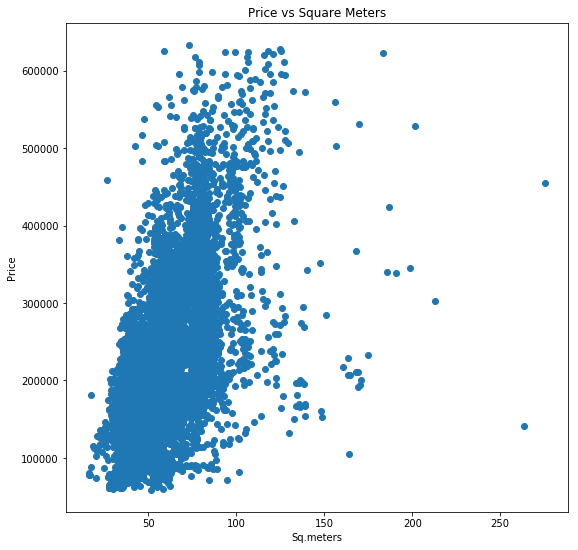

In [92]:
plt.scatter(df.Square, df.Price) #plt.scatter(x, y....)
plt.title("Price vs Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [93]:
#chart is cleaner now. some outliers are not longer there. trend is there but overall price prediction will need other params too

Text(0,0.5,'Price')

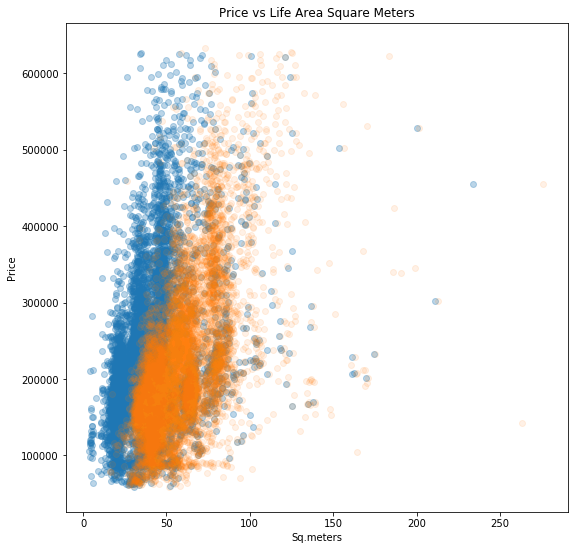

In [94]:
plt.scatter(df.LifeSquare, df.Price, alpha = 0.3) #plt.scatter(x, y....)
plt.scatter(df.Square, df.Price, alpha = 0.1)
plt.title("Price vs Life Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [95]:
#there seems to be another cloud forming for 60-100+ sq meters

In [96]:
area =60

Big_apts = df.loc[df['Square']>area]['Square']
Price_big = df.loc[df['Square']>area]['Price']
Small_apts = df.loc[df['Square']<area]

Big_apts.size, Price_big.size


(3657, 3657)

Text(0,0.5,'Price')

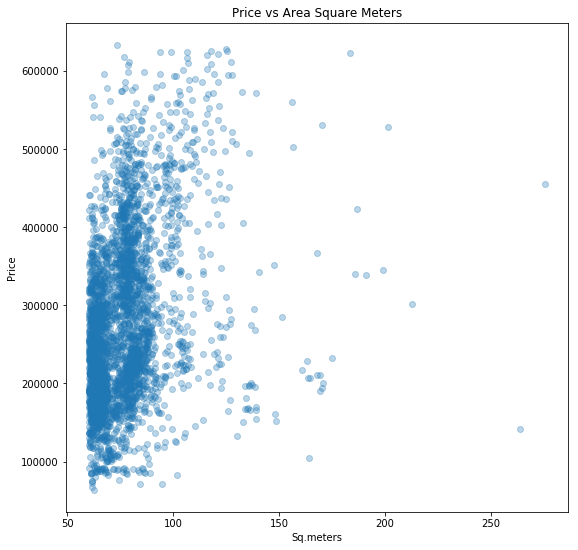

In [97]:

plt.scatter(Big_apts,Price_big, alpha = 0.3) #plt.scatter(x, y....)
#plt.scatter(Small_apts, df.Price, alpha = 0.1)
plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [98]:
# nope nothing obvious. maybe this

area =70

Big_apts = df.loc[df['Square']>area]['Square']
Price_big = df.loc[df['Square']>area]['Price']
Small_apts = df.loc[df['Square']<area]['Square']
Price_small = df.loc[df['Square']<area]['Price']

Big_apts.size, Price_big.size, Small_apts.size, Price_small.size


(2021, 2021, 7979, 7979)

Text(0,0.5,'Price')

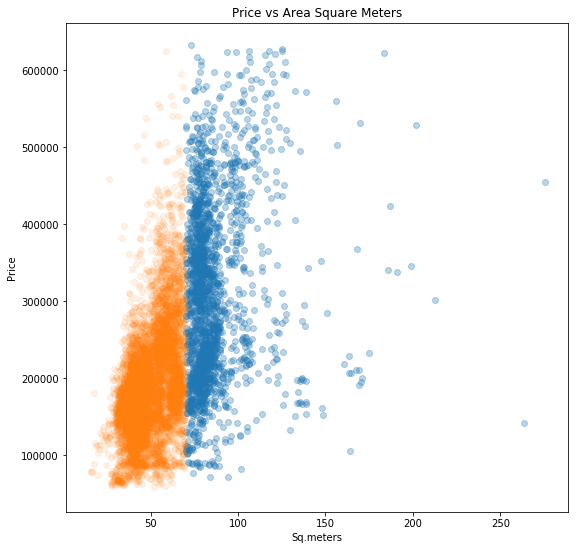

In [99]:

plt.scatter(Big_apts,Price_big, alpha = 0.3) #plt.scatter(x, y....)
plt.scatter(Small_apts, Price_small, alpha = 0.1)
plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

Text(0,0.5,'Price')

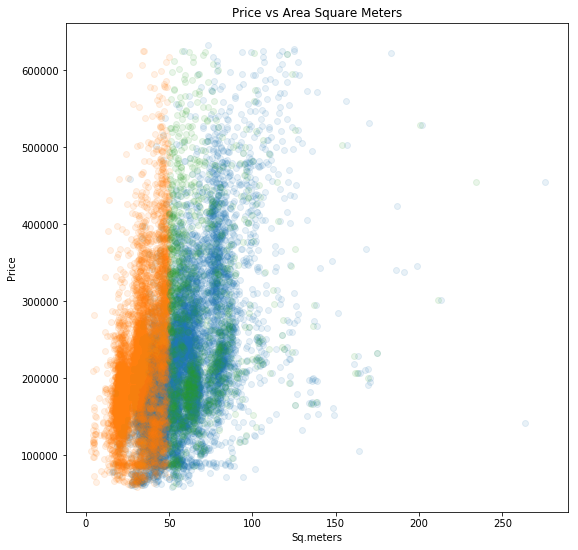

In [100]:
area =50

Big_life_area = df.loc[df['LifeSquare']>area]['LifeSquare']
Price_big_la = df.loc[df['LifeSquare']>area]['Price']

Small_life_area = df.loc[df['LifeSquare']<area]['LifeSquare']
Price_small_la = df.loc[df['LifeSquare']<area]['Price']


plt.scatter(df.Square,df.Price, alpha = 0.1) #plt.scatter(x, y....)
plt.scatter(Small_life_area, Price_small_la, alpha = 0.1)
plt.scatter(Big_life_area, Price_big_la, alpha = 0.1)

plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

Text(0,0.5,'Price')

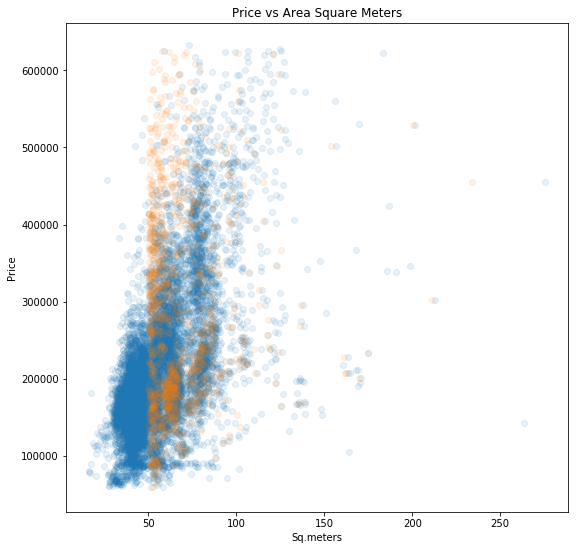

In [101]:
area =50

Big_life_area = df.loc[df['LifeSquare']>area]['LifeSquare']
Price_big_la = df.loc[df['LifeSquare']>area]['Price']

Small_life_area = df.loc[df['LifeSquare']<area]['LifeSquare']
Price_small_la = df.loc[df['LifeSquare']<area]['Price']


plt.scatter(df.Square,df.Price, alpha = 0.1) #plt.scatter(x, y....)
#plt.scatter(Small_life_area, Price_small_la, alpha = 0.1)
plt.scatter(Big_life_area, Price_big_la, alpha = 0.1)

plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [102]:
#nope.might need prabola....here
# lets try by district

In [103]:
df.head(20)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0   14038          35    2.0   47.981561   29.442751            6.0      7   
1   15053          41    3.0   65.683640   40.049543            8.0      7   
2    4765          53    2.0   44.947953   29.197612            0.0      8   
3    5809          58    2.0   53.352981   52.731512            9.0      8   
4   10783          99    1.0   39.649192   23.776169            7.0     11   
5   12915          59    3.0   80.384479   46.683720           12.0      5   
6   14549         154    2.0   62.254114   37.160377            7.0      3   
7   11993          74    2.0   80.312926         NaN            0.0     14   
8    5172           1    2.0   64.511437         NaN            1.0      9   
9    8649          23    1.0   46.461409   18.915552            8.0     13   
10  15370          28    2.0   46.304907   27.922584            6.0      8   
11  12427          31    3.0   68.808859   45.736906            7.0      1   
12   6452          13    2.0   54.522805   31.759753            1.0      8   
13   2408          57    3.0   68.102739   39.311493            8.0      6   
14  10953          27    1.0   53.769097   52.408027            1.0      5   
15   2823          85    3.0   73.612225   53.892089            6.0      4   
16   2119          27    2.0   49.360648   31.993964            5.0      6   
17   3000          34    2.0   57.969964   32.012483            9.0      6   
18   2829          57    1.0   44.513481   23.113423            8.0      6   
19   4909          19    3.0  110.959792   56.996765           11.0     16   

    HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0          9.0       1969   0.089040         B         B        33      7976   
1          9.0       1978   0.000070         B         B        46     10309   
2         12.0       1968   0.049637         B         B        34      7759   
3         17.0       1977   0.437885         B         B        23      5735   
4         12.0       1976   0.012339         B         B        35      5776   
5         17.0       2011   0.309479         B         B        35      7715   
6          5.0       1960   0.460556         B         B        20      4386   
7          0.0       1977   0.075779         B         B         6      1437   
8         17.0       1977   0.007122         B         B         1       264   
9         17.0       2014   0.075779         B         B         6      1437   
10         9.0       1973   0.118537         B         B        30      6207   
11         8.0       1959   0.000000         B         B        23      3684   
12        12.0       1999   0.090799         B         B        74     19083   
13        12.0       1980   0.133215         B         B        49     11395   
14         4.0       1977   0.072158         B         B         2       629   
15         9.0       1979   0.037178         B         B        52     11217   
16         5.0       1983   0.051815         B         B         5      1227   
17        14.0       2001   0.069753         B         B        53     13670   
18        12.0       1983   0.133215         B         B        49     11395   
19        25.0       2012   0.000991         B         B        33      6783   

    Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0          5           NaN            0       11       B  184966.930730  
1          1         240.0            1       16       B  300009.450063  
2          0         229.0            1        3       B  220925.908524  
3          3        1084.0            0        5       B  175616.227217  
4          1        2078.0            2        4       B  150226.531644  
5          4         990.0            0        6       B  215898.447742  
6         14           NaN            1        5       B  296021.204377  
7          3           NaN            0        2       B  221244.156664  
8          0         

Text(0,0.5,'Price')

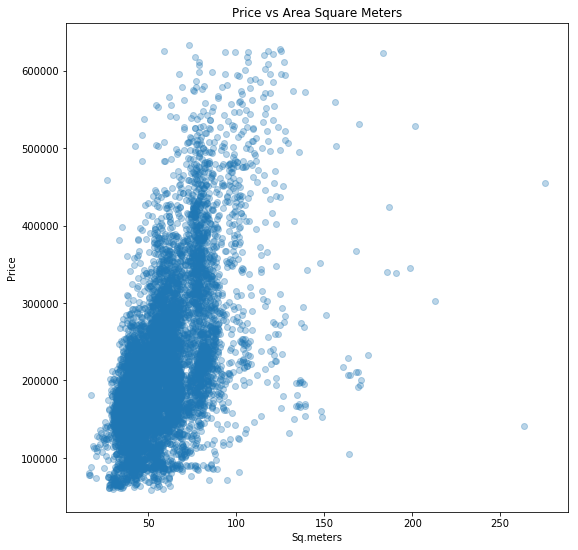

In [104]:
plt.scatter(df.Square,df.Price, alpha = 0.3) #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [105]:
df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
62     247
30     228
58     179
53     174
21     165
52     143
8      142
11     129
46     119
61     118
45     116
74     114
34     111
57     107
44     104
99      97
101     97
47      97
13      97
7       92
48      90
29      89
94      89
41      87
3       82
      ... 
133      5
166      5
189      5
65       5
188      5
82       5
112      4
136      4
179      4
50       4
182      4
180      4
185      3
193      3
201      3
175      3
181      3
208      2
158      2
172      2
195      2
202      2
186      2
196      1
117      1
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [106]:
df.loc[df['DistrictId']==27]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
14    10953          27    1.0   53.769097   52.408027            1.0      5   
16     2119          27    2.0   49.360648   31.993964            5.0      6   
21    11935          27    2.0   64.711835         NaN            1.0     15   
26     4378          27    3.0  106.958871   64.182211            0.0     17   
32    13253          27    2.0   63.679116   37.275775            1.0      9   
69     6925          27    2.0   64.929103   63.304605           10.0     15   
70    10362          27    2.0   79.227049         NaN            0.0      9   
85    11248          27    2.0   54.583231   33.320302           11.0      2   
96    14319          27    2.0   58.937280   34.740070           11.0      2   
108    3276          27    2.0   62.224569   58.503985            1.0      8   
115   12377          27    2.0   60.445855         NaN            1.0     13   
131   10726          27    3.0   89.692964   87.623814            1.0     13   
136    6172          27    2.0   92.400007   92.069236           10.0      2   
147    3287          27    3.0   92.885544   91.642249           13.0      7   
158   16779          27    3.0   51.991064   48.962019            1.0     22   
161    4263          27    1.0   54.255191   51.135219            0.0      5   
173    5790          27    1.0   47.177184         NaN            1.0      5   
175    1288          27    3.0   82.515911   45.376024            1.0      5   
177    9785          27    2.0   62.640390   34.998513           10.0      5   
205    7567          27    2.0   74.214090         NaN            1.0      8   
209    8075          27    1.0   43.372519   20.374715            9.0     17   
213    9435          27    1.0   46.848993   22.597569            8.0      8   
217    5540          27    3.0   59.425078   57.643613            9.0     16   
223    4622          27    2.0   62.153994   36.094352            0.0      5   
233    3219          27    2.0   75.378683   53.904774           12.0      3   
234   12633          27    3.0   81.884548   81.867166            0.0     12   
252    8139          27    2.0   58.553809         NaN            0.0      7   
255   12533          27    1.0   43.325043   37.160691            1.0      5   
268   13861          27    2.0   60.722436   31.879817           12.0      5   
285    7434          27    3.0   77.329774   43.680121           10.0     18   
...     ...         ...    ...         ...         ...            ...    ...   
9651   9442          27    1.0   37.858920   22.329393            8.0      5   
9656   4956          27    1.0   44.881534         NaN            1.0      3   
9660  11320          27    1.0   41.299844         NaN            0.0      7   
9698  13616          27    1.0   37.340508   37.024631           10.0      8   
9731   1940          27    2.0   53.029413         NaN            1.0     14   
9748  14053          27    2.0   56.564445   26.165347            1.0      7   
9756  13583          27    2.0   58.943039   33.194859            1.0     11   
9767  11149          27    1.0   39.285713         NaN            1.0     14   
9771   8707          27    3.0   88.570699   46.295629           13.0     17   
9779   6793          27    1.0   43.108815         NaN            1.0     11   
9795   2579          27    3.0   88.604614   51.852501           11.0      7   
9799   7483          27    1.0   41.074410   37.590772            1.0      5   
9811  10801          27    1.0   29.386944   16.820321            5.0      3   
9821   3469          27    3.0  103.654338         NaN            1.0      5   
9846   7304          27    2.0   67.089813   61.486018            1.0      9   
9854   3111          27    2.0   64.526680         NaN            1.0     17   
9870    309          27    1.0   37.551366         NaN            1.0     11   
9886  14495          27    2.0   76.370258         NaN            1.0     10   
9892    6

Text(0,0.5,'Price')

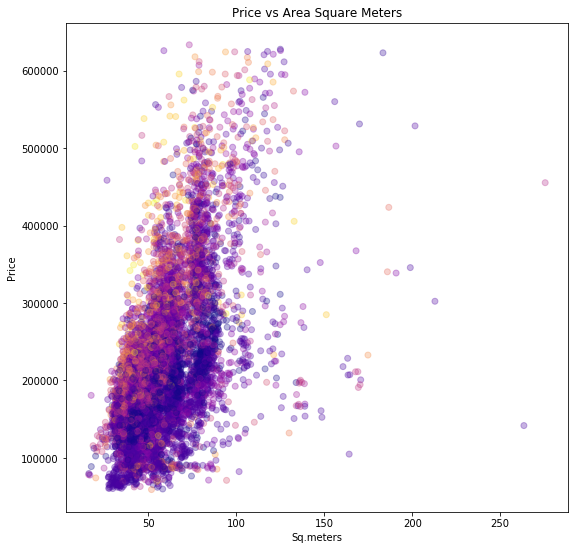

In [107]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Square,df.Price, c = df.DistrictId, alpha = 0.3, cmap='plasma') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

In [108]:
df.loc[df['DistrictId']==27]['DistrictId'].size, df.loc[df['DistrictId']==27]['Price'].size

(851, 851)

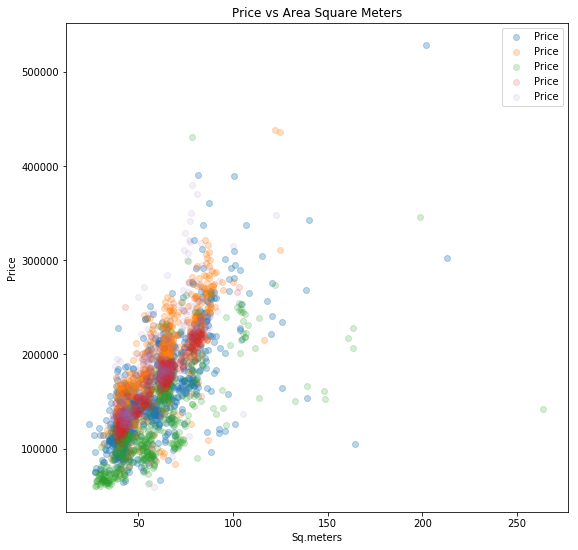

In [109]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.loc[df['DistrictId']==27]['Square'], df.loc[df['DistrictId']==27]['Price'], alpha = 0.3)
plt.scatter(df.loc[df['DistrictId']==1]['Square'], df.loc[df['DistrictId']==1]['Price'], alpha = 0.25)
plt.scatter(df.loc[df['DistrictId']==23]['Square'], df.loc[df['DistrictId']==23]['Price'], alpha = 0.2)
plt.scatter(df.loc[df['DistrictId']==6]['Square'], df.loc[df['DistrictId']==6]['Price'], alpha = 0.15)
plt.scatter(df.loc[df['DistrictId']==9]['Square'], df.loc[df['DistrictId']==9]['Price'], alpha = 0.1)
plt.title("Price vs Area Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')
plt.legend()

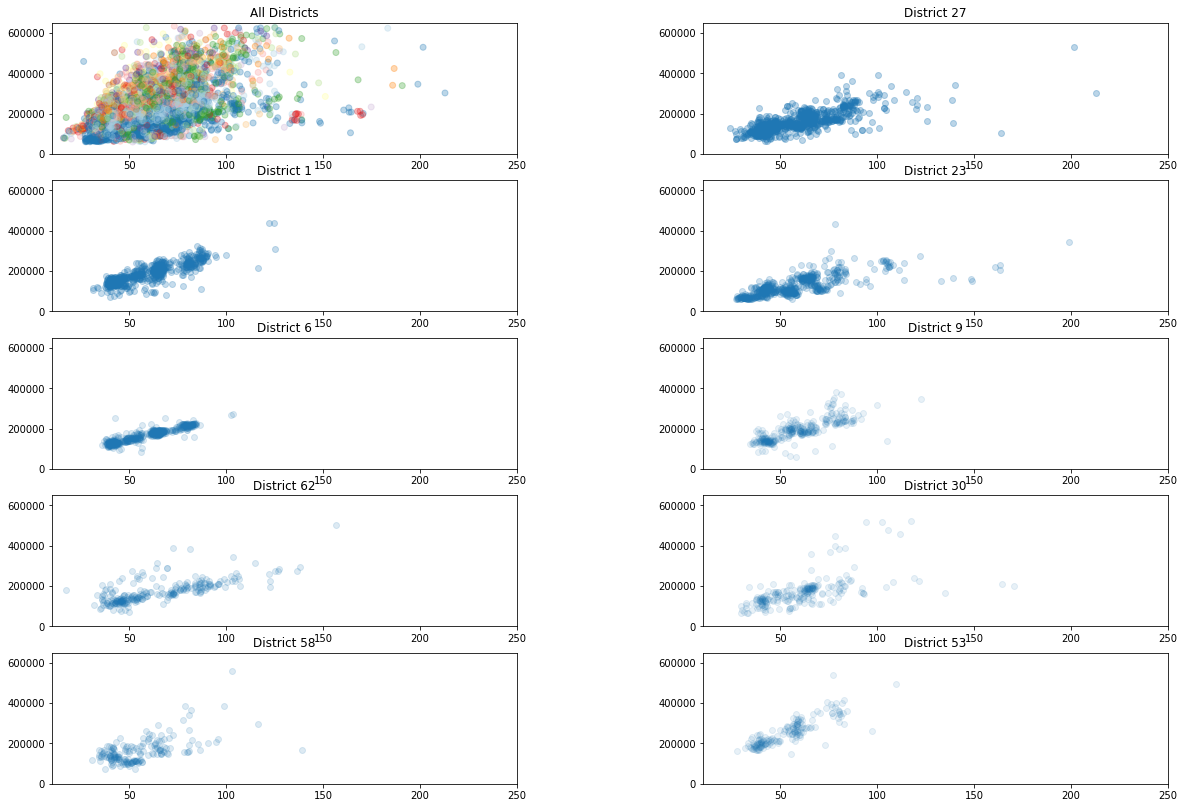

In [110]:
fig, ax = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8,ax9 = ax.flatten()

ax0.scatter(df.Square,df.Price, c = df.DistrictId, alpha = 0.3, cmap='Paired')
ax0.set_title('All Districts')
ax1.scatter(df.loc[df['DistrictId']==27]['Square'], df.loc[df['DistrictId']==27]['Price'], alpha = 0.3)
ax1.set_title('District 27')
ax2.scatter(df.loc[df['DistrictId']==1]['Square'], df.loc[df['DistrictId']==1]['Price'], alpha = 0.25)
ax2.set_title('District 1')
ax3.scatter(df.loc[df['DistrictId']==23]['Square'], df.loc[df['DistrictId']==23]['Price'], alpha = 0.2)
ax3.set_title('District 23')
ax4.scatter(df.loc[df['DistrictId']==6]['Square'], df.loc[df['DistrictId']==6]['Price'], alpha = 0.15)
ax4.set_title('District 6')
ax5.scatter(df.loc[df['DistrictId']==9]['Square'], df.loc[df['DistrictId']==9]['Price'], alpha = 0.1)
ax5.set_title('District 9')
ax6.scatter(df.loc[df['DistrictId']==62]['Square'], df.loc[df['DistrictId']==62]['Price'], alpha = 0.15)
ax6.set_title('District 62')
ax7.scatter(df.loc[df['DistrictId']==30]['Square'], df.loc[df['DistrictId']==30]['Price'], alpha = 0.1)
ax7.set_title('District 30')
ax8.scatter(df.loc[df['DistrictId']==58]['Square'], df.loc[df['DistrictId']==58]['Price'], alpha = 0.15)
ax8.set_title('District 58')
ax9.scatter(df.loc[df['DistrictId']==53]['Square'], df.loc[df['DistrictId']==53]['Price'], alpha = 0.1)
ax9.set_title('District 53')

ax0.set_xlim(10,250)
ax1.set_xlim(10,250)
ax2.set_xlim(10,250)
ax3.set_xlim(10,250)
ax4.set_xlim(10,250)
ax5.set_xlim(10,250)
ax6.set_xlim(10,250)
ax7.set_xlim(10,250)
ax8.set_xlim(10,250)
ax9.set_xlim(10,250)

ax0.set_ylim(0,650000)
ax1.set_ylim(0,650000)
ax2.set_ylim(0,650000)
ax3.set_ylim(0,650000)
ax4.set_ylim(0,650000)
ax5.set_ylim(0,650000)
ax6.set_ylim(0,650000)
ax7.set_ylim(0,650000)
ax8.set_ylim(0,650000)
ax9.set_ylim(0,650000)

fig.set_size_inches(20, 14)
plt.subplots_adjust(hspace=0.2, wspace = 0.4)

## Price vs Square - linear trend
every district preserve same trend, but price range is different. so need to keep DistrictId


In [111]:
df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
62     247
30     228
58     179
53     174
21     165
52     143
8      142
11     129
46     119
61     118
45     116
74     114
34     111
57     107
44     104
99      97
101     97
47      97
13      97
7       92
48      90
29      89
94      89
41      87
3       82
      ... 
133      5
166      5
189      5
65       5
188      5
82       5
112      4
136      4
179      4
50       4
182      4
180      4
185      3
193      3
201      3
175      3
181      3
208      2
158      2
172      2
195      2
202      2
186      2
196      1
117      1
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [112]:
df.loc[df['DistrictId']==62]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
65    11398          62    1.0   41.194188         NaN       0.000000      6   
146    9892          62    2.0   71.304763         NaN       1.000000     13   
153    9870          62    1.0   53.491301   51.831473      12.764706      5   
155   14109          62    1.0   47.577280   43.123508       1.000000      6   
185   10731          62    3.0   67.632607   43.867620       7.000000      8   
194     141          62    2.0   67.677603         NaN       1.000000     11   
203    7985          62    3.0   88.491397         NaN       1.000000     11   
301   14374          62    3.0   90.824614         NaN       1.000000      4   
306   10149          62    2.0   46.099792   32.212311       6.000000     10   
330    3590          62    1.0   40.160194   21.169896       8.000000     10   
345    1912          62    3.0   87.127255         NaN       1.000000      6   
358    6006          62    3.0  122.497641  121.844004       1.000000      3   
390   11813          62    2.0   72.683847   34.000722      12.000000     14   
478   10391          62    1.0   40.371530   37.498161       1.000000     21   
663     220          62    2.0   77.475090         NaN       1.000000      6   
707    4345          62    1.0   49.275155   13.772843      12.764706      5   
718    2206          62    2.0   79.549642         NaN       1.000000     13   
734    4319          62    1.0   51.815214   42.030727       1.000000      6   
751   11989          62    3.0  104.446306   14.510667       1.000000     12   
806    8332          62    1.0   44.729574   19.576604      11.000000      5   
839    9925          62    1.0   42.805164         NaN       0.000000     14   
868   11723          62    1.0   46.771683         NaN       1.000000      7   
876   11097          62    2.0   51.853204   31.814428       7.000000     12   
893    2178          62    2.0   72.281982         NaN       0.000000      4   
899    2236          62    1.0   40.264430         NaN      12.764706      5   
933   12430          62    1.0   45.765945   18.452619      11.000000      5   
1042  10297          62    3.0   99.348269         NaN       0.000000      8   
1056   1780          62    2.0   71.125280         NaN       0.000000      9   
1064  14656          62    1.0   47.100719   46.447960      12.764706      4   
1164   6263          62    3.0   87.567892         NaN       1.000000      4   
...     ...         ...    ...         ...         ...            ...    ...   
8875   1453          62    3.0  106.330403  103.618474       0.000000      5   
8927   1034          62    1.0   36.190302   17.996515       6.000000      2   
8954   6581          62    2.0   65.131558         NaN       0.000000     11   
9003  16015          62    3.0   86.836992   85.726420       1.000000     11   
9009  14159          62    2.0   71.140161   36.775877      16.000000      5   
9024   4168          62    1.0   52.984021   51.280123      14.000000      7   
9030   8329          62    3.0   86.443771         NaN       0.000000      3   
9051   1708          62    2.0   78.425648   31.702891      14.000000     14   
9066   5290          62    3.0   69.432296   47.001356       7.000000      8   
9073   5237          62    3.0   91.201910   89.997082       1.000000     10   
9076  11267          62    1.0   43.696023   42.027177      12.764706     14   
9179   9762          62    4.0   64.283247   47.156752       6.000000      9   
9186   6094          62    1.0   39.504184   37.590951      10.000000     10   
9194   7718          62    1.0   43.242139         NaN      10.000000     10   
9199   8755          62    2.0   79.329878         NaN       0.000000     17   
9250   2905          62    2.0   76.775595   74.393929       0.000000      2   
9268  13665          62    2.0   57.717659         NaN       0.000000     10   
9285  14706          62    3.0   69.408293   66.106302      11.000000      7   
9395  163

Text(0,0.5,'Price')

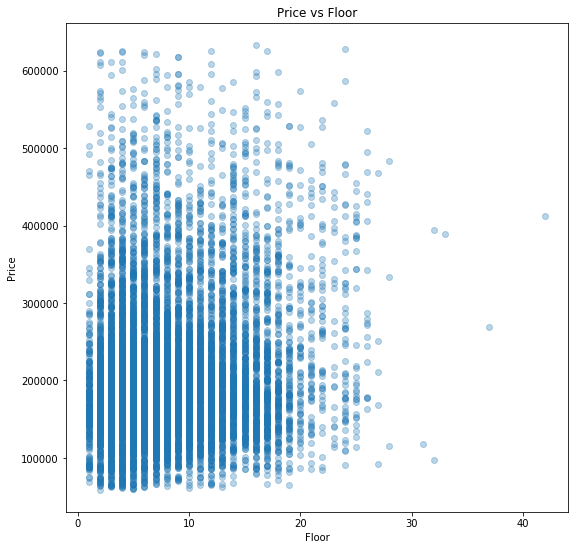

In [113]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Floor,df.Price, alpha = 0.3) #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs Floor")
plt.xlabel('Floor')
plt.ylabel('Price')

In [114]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.328134    36.570184   
std     4859.01902     43.587592      0.821937     19.226985    17.091322   
min        0.00000      0.000000      0.000000     15.988889     3.386009   
25%     4169.50000     20.000000      1.000000     41.881659    23.165686   
50%     8394.50000     36.000000      2.000000     52.633651    33.016068   
75%    12592.50000     75.000000      2.000000     65.985903    45.225577   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        5.895600      8.526700     12.609400   1984.866300      0.118858   
std         5.177999      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max       123.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [115]:
df.loc[df['KitchenSquare']<1.1]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2      4765          53    2.0   44.947953   29.197612            0.0      8   
7     11993          74    2.0   80.312926         NaN            0.0     14   
8      5172           1    2.0   64.511437         NaN            1.0      9   
12     6452          13    2.0   54.522805   31.759753            1.0      8   
14    10953          27    1.0   53.769097   52.408027            1.0      5   
21    11935          27    2.0   64.711835         NaN            1.0     15   
23     6641          54    3.0  118.907612         NaN            0.0      2   
25     5073          74    2.0   82.667915         NaN            1.0     16   
26     4378          27    3.0  106.958871   64.182211            0.0     17   
27     7550          23    2.0   64.556209         NaN            1.0      8   
28     8054          23    1.0   43.967759   42.530043            1.0      3   
32    13253          27    2.0   63.679116   37.275775            1.0      9   
36    11703          23    1.0   41.118766         NaN            1.0      4   
39     9371          23    2.0   60.503248         NaN            0.0     16   
42     9833           1    2.0   56.494318   54.723569            0.0      9   
43      175          23    2.0   58.692133         NaN            1.0     16   
44    10521          38    3.0  106.340403  104.211396            0.0     20   
46     1821          23    2.0   49.929489         NaN            1.0      9   
52     2301           1    2.0   65.224603   61.400054            0.0     17   
54    16334           1    1.0   42.414176         NaN            1.0     14   
57     3203          23    2.0   56.218702         NaN            1.0      3   
61     4191           1    2.0   65.023899         NaN            1.0     10   
63     7605           6    1.0   42.505532         NaN            1.0      6   
64     9723          52    2.0   64.141152         NaN            1.0      5   
65    11398          62    1.0   41.194188         NaN            0.0      6   
70    10362          27    2.0   79.227049         NaN            0.0      9   
71     2136          74    2.0   84.687732   81.905552            0.0     12   
72    14675          74    1.0   52.457589   52.423345            0.0     18   
74     4014           6    2.0   63.184422   61.142894            1.0     17   
76    14020          34    1.0   47.909327   42.782385            1.0      2   
...     ...         ...    ...         ...         ...            ...    ...   
9914  11428           1    2.0   69.407574         NaN            1.0     15   
9917   1901          94    1.0   45.822669         NaN            1.0      7   
9923  16273          30    2.0   63.905356         NaN            1.0      6   
9926  10680           1    1.0   41.657661         NaN            1.0      2   
9931  13355          27    2.0   64.261856         NaN            1.0     10   
9936  15173          30    2.0   62.341347         NaN            1.0     19   
9938  15868           9    2.0   64.412326   61.337938            1.0     13   
9942   9369           1    2.0   56.323990         NaN            1.0     18   
9944  16160          27    2.0   60.396765         NaN            0.0     10   
9946   4470          62    3.0   89.915337         NaN            0.0     13   
9948   8438           1    2.0   66.736039         NaN            0.0     16   
9949   3355          53    1.0   39.211416   36.159431            1.0     19   
9951   9237          25    1.0   33.516313   31.086243            1.0     13   
9953   5365           1    2.0   61.049491         NaN            0.0     11   
9954    583          27    3.0   84.250710   41.878848            1.0     15   
9960   9307           1    2.0   57.376642         NaN            0.0      8   
9961   1579          23    1.0   27.331108         NaN            1.0     10   
9963  15035           1    2.0   66.547650         NaN            1.0     13   
9964  104

In [116]:
#lots apts from district # 23
df.loc[(df['KitchenSquare']<11) & (df['DistrictId']== 27)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
14    10953          27    1.0   53.769097   52.408027            1.0      5   
16     2119          27    2.0   49.360648   31.993964            5.0      6   
21    11935          27    2.0   64.711835         NaN            1.0     15   
26     4378          27    3.0  106.958871   64.182211            0.0     17   
32    13253          27    2.0   63.679116   37.275775            1.0      9   
69     6925          27    2.0   64.929103   63.304605           10.0     15   
70    10362          27    2.0   79.227049         NaN            0.0      9   
108    3276          27    2.0   62.224569   58.503985            1.0      8   
115   12377          27    2.0   60.445855         NaN            1.0     13   
131   10726          27    3.0   89.692964   87.623814            1.0     13   
136    6172          27    2.0   92.400007   92.069236           10.0      2   
158   16779          27    3.0   51.991064   48.962019            1.0     22   
161    4263          27    1.0   54.255191   51.135219            0.0      5   
173    5790          27    1.0   47.177184         NaN            1.0      5   
175    1288          27    3.0   82.515911   45.376024            1.0      5   
177    9785          27    2.0   62.640390   34.998513           10.0      5   
205    7567          27    2.0   74.214090         NaN            1.0      8   
209    8075          27    1.0   43.372519   20.374715            9.0     17   
213    9435          27    1.0   46.848993   22.597569            8.0      8   
217    5540          27    3.0   59.425078   57.643613            9.0     16   
223    4622          27    2.0   62.153994   36.094352            0.0      5   
234   12633          27    3.0   81.884548   81.867166            0.0     12   
252    8139          27    2.0   58.553809         NaN            0.0      7   
255   12533          27    1.0   43.325043   37.160691            1.0      5   
285    7434          27    3.0   77.329774   43.680121           10.0     18   
296     513          27    2.0   57.134181         NaN            0.0     16   
302    1179          27    1.0   55.069222         NaN            1.0     13   
309    2537          27    1.0   47.717543         NaN            1.0     13   
315   14899          27    1.0   39.184607   37.370830            1.0     25   
333   11210          27    2.0   68.453814   66.918934            0.0     15   
...     ...         ...    ...         ...         ...            ...    ...   
9624   4443          27    2.0   62.015976         NaN            1.0     11   
9628  14936          27    3.0  103.587261         NaN            0.0      8   
9630  10021          27    1.0   41.857484   41.755282            1.0     13   
9637   8959          27    1.0   44.602693   44.108220            1.0      2   
9647  13316          27    2.0   67.311133   37.116405            9.0     12   
9651   9442          27    1.0   37.858920   22.329393            8.0      5   
9656   4956          27    1.0   44.881534         NaN            1.0      3   
9660  11320          27    1.0   41.299844         NaN            0.0      7   
9698  13616          27    1.0   37.340508   37.024631           10.0      8   
9731   1940          27    2.0   53.029413         NaN            1.0     14   
9748  14053          27    2.0   56.564445   26.165347            1.0      7   
9756  13583          27    2.0   58.943039   33.194859            1.0     11   
9767  11149          27    1.0   39.285713         NaN            1.0     14   
9779   6793          27    1.0   43.108815         NaN            1.0     11   
9799   7483          27    1.0   41.074410   37.590772            1.0      5   
9811  10801          27    1.0   29.386944   16.820321            5.0      3   
9821   3469          27    3.0  103.654338         NaN            1.0      5   
9846   7304          27    2.0   67.089813   61.486018            1.0      9   
9854   31

In [117]:
#nothing stands out, lets make all kitchen area = NaN



Text(0,0.5,'Price')

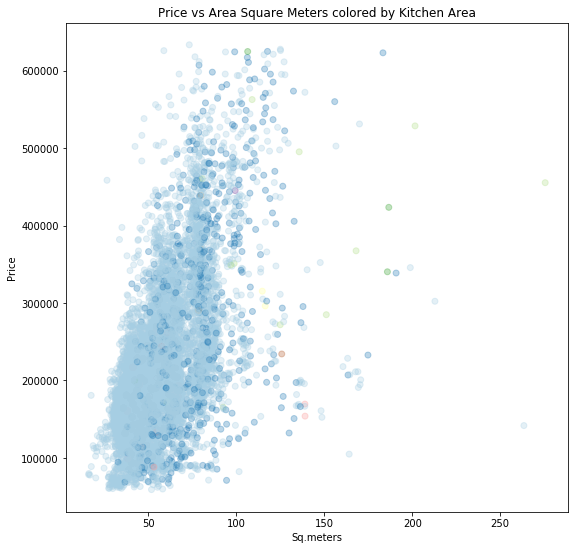

In [118]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Square,df.Price, c = df.KitchenSquare, alpha = 0.3, cmap = 'Paired') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs Area Square Meters colored by Kitchen Area")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

nothing here
nor from kitchen area, floor

Text(0,0.5,'Price')

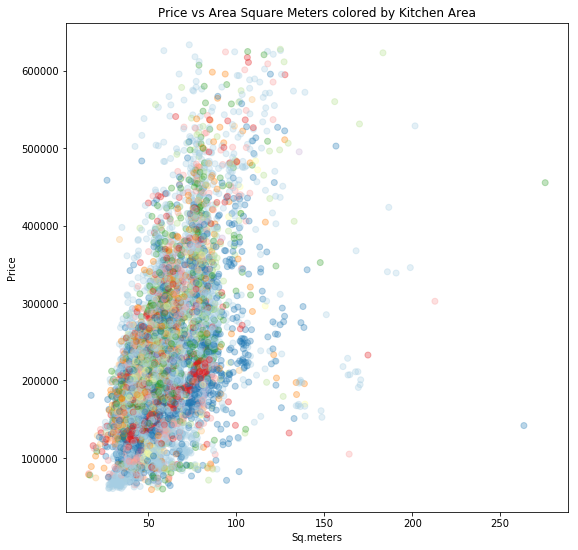

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Square,df.Price, c = df.Ecology_1, alpha = 0.3, cmap = 'Paired') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs Area Square Meters colored by Kitchen Area")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

ecology_1 does seem to have impact unless it coresponds to a certain district. which is driving the same linear trend

In [120]:
df['Ecology_1'].value_counts().head(10)

0.007122    587
0.000000    537
0.243205    511
0.072158    486
0.075779    346
0.000078    245
0.069753    204
0.161532    202
0.034656    190
0.090799    176
Name: Ecology_1, dtype: int64

In [121]:
df.loc[df['Ecology_1'] < 0.0072] # 0.007122    587 corresponds to district #1 which is number 2 if frequency and has a linear trend

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1     15053          41    3.0   65.683640   40.049543            8.0      7   
8      5172           1    2.0   64.511437         NaN            1.0      9   
11    12427          31    3.0   68.808859   45.736906            7.0      1   
19     4909          19    3.0  110.959792   56.996765           11.0     16   
23     6641          54    3.0  118.907612         NaN            0.0      2   
29      522          11    2.0   48.372232   31.007581            6.0      4   
35     6486         200    3.0   85.280389   58.447967            9.0      6   
38     8224         177    3.0   77.873936   48.991133           12.0      9   
42     9833           1    2.0   56.494318   54.723569            0.0      9   
52     2301           1    2.0   65.224603   61.400054            0.0     17   
54    16334           1    1.0   42.414176         NaN            1.0     14   
57     3203          23    2.0   56.218702         NaN            1.0      3   
59    12393          11    2.0   57.322494   31.788006           10.0      5   
61     4191           1    2.0   65.023899         NaN            1.0     10   
62     7619          47    2.0   54.787324   33.512143            8.0      1   
68     1063          77    1.0   42.678844   23.918634            8.0     14   
79    12162          69    1.0   39.252555   19.394251            7.0      1   
80    15600         108    2.0   49.888740   31.603650            6.0      9   
83     2855          18    2.0   61.718553   33.040115           10.0     10   
89    11902         128    2.0   52.082183   34.017057            8.0      7   
94    13887           7    3.0   74.971054   46.239248           10.0     16   
100   14756           1    1.0   50.617768   46.505676            1.0     10   
101    3973           1    2.0   62.969903   31.745611           10.0     14   
102   13957         123    2.0   58.911918   33.612241            9.0     12   
109    6761          70    2.0   45.592913   27.278459            6.0      3   
114   14635          95    2.0   42.389567   33.064835            5.0      1   
117    3975           1    2.0   65.009279         NaN            1.0      9   
118   14822          18    3.0   76.235137   47.001817           10.0      9   
124   11279          19    2.0   74.441377   35.640269            9.0     23   
125    8691           1    2.0   55.233213         NaN            1.0     13   
...     ...         ...    ...         ...         ...            ...    ...   
9858   8505          56    3.0   74.472871   45.589962            9.0     12   
9859   9020          23    2.0   56.549866   54.619898            1.0      1   
9873     55           1    2.0   65.825598         NaN            1.0     16   
9884     41          30    2.0   59.439082   59.015896           12.0      5   
9887   1418          41    2.0   54.567862   34.643737            8.0     10   
9889  12918          23    2.0   53.134243   51.440463           51.0      3   
9904  10649          46    3.0   51.622416   37.710132            5.0      7   
9914  11428           1    2.0   69.407574         NaN            1.0     15   
9916  16712         109    2.0   58.139901   36.954603           10.0     14   
9921  11426           0    2.0   56.724377   32.602235            8.0      9   
9923  16273          30    2.0   63.905356         NaN            1.0      6   
9926  10680           1    1.0   41.657661         NaN            1.0      2   
9928   2925          23    1.0   37.609648   21.785685            8.0      5   
9936  15173          30    2.0   62.341347         NaN            1.0     19   
9942   9369           1    2.0   56.323990         NaN            1.0     18   
9948   8438           1    2.0   66.736039         NaN            0.0     16   
9953   5365           1    2.0   61.049491         NaN            0.0     11   
9958  12878          46    1.0   39.143939   22.650690            8.0     14   
9960   93

In [122]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.888700     56.328134    36.570184   
std     4859.01902     43.587592      0.821937     19.226985    17.091322   
min        0.00000      0.000000      0.000000     15.988889     3.386009   
25%     4169.50000     20.000000      1.000000     41.881659    23.165686   
50%     8394.50000     36.000000      2.000000     52.633651    33.016068   
75%    12592.50000     75.000000      2.000000     65.985903    45.225577   
max    16798.00000    209.000000     10.000000    275.645284   233.949309   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        5.895600      8.526700     12.609400   1984.866300      0.118858   
std         5.177999      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max       123.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [123]:
df.loc[df['Rooms']==0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1397  12638          27    0.0  138.427694  136.215499            0.0      4   
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
2269   7317          27    0.0   41.790881         NaN            0.0     13   
3911    770          28    0.0   49.483501         NaN            0.0     16   
4366    456           6    0.0   81.491446         NaN            0.0      4   
4853   3224          27    0.0   23.772476    8.731467            0.0      1   
6149   3159          88    0.0   38.697117   19.345131            9.0      9   
8834   9443          27    0.0   87.762616   85.125471            0.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1397         3.0       2016   0.075424         B         B        11   
1981         3.0       2008   0.211401         B         B         9   
2269         0.0       1977   0.211401         B         B         9   
3911         0.0       2015   0.118537         B         B        30   
4366         0.0       1977   0.243205         B         B         5   
4853         0.0       1977   0.017647         B         B         2   
6149        16.0       1982   0.127376         B         B        43   
8834        15.0       1977   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1397      3097         0           NaN            0        0       B   
1981      1892         0           NaN            0        1       B   
2269      1892         0           NaN            0        1       B   
3911      6207         1        1183.0            1        0       B   
4366      1564         0         540.0            0        0       B   
4853       469         0           NaN            0        0       B   
6149      8429         3           NaN            3        9       B   
8834      1892         0           NaN            0        1       B   

              Price  
1397  268394.744389  
1981  302211.260887  
2269   98129.976788  
3911  217009.338463  
4366  212864.799112  
4853  126596.941798  
6149  158998.110646  
8834  219281.918007

In [124]:
#insignificant # of apt with 0 rooms. should not impact much

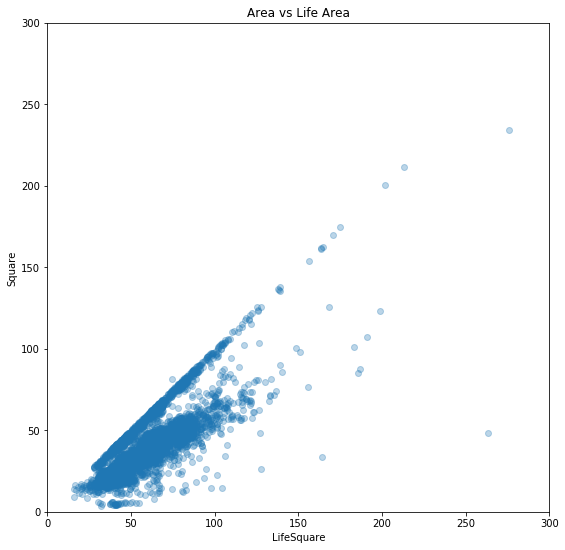

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Square,df.LifeSquare, alpha = 0.3, cmap = 'Paired') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Area vs Life Area")
plt.xlabel('LifeSquare')
plt.ylabel('Square')

plt.ylim(0,300)
plt.xlim(0,300)

plt.savefig('Area_vs_LifeArea_cleanedup.png')

In [126]:
df.loc[df['Id']==12645]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5251  12645          45    1.0  29.412001   15.915694            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
5251         5.0       1967   0.014423         B         B        19   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
5251      3806         4           NaN            0        3       B   

              Price  
5251  150888.311763

In [127]:
df.loc[df['Id']==6782]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
9294  6782          45    1.0  52.572785   29.543086            1.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
9294         1.0       1977   0.195781         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
9294      5212         6           NaN            3        2       B   

              Price  
9294  438005.182323

In [128]:
df.loc[df['KitchenSquare']>100]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2969   7441          62    3.0  114.734473  112.589083          112.0      3   
4651  12552          58    3.0  116.405693  113.109653          112.0      3   
9895   2737          27    3.0  125.806981  123.430072          123.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2969         3.0       2015   0.072158         B         B         2   
4651         3.0       2016   0.437885         B         B        23   
9895        10.0       2015   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
2969       629         1           NaN            0        0       A   
4651      5735         3        1084.0            0        5       B   
9895       469         0           NaN            0        0       B   

              Price  
2969  315245.521059  
4651  296165.936689  
9895  234194.837047

Text(0,0.5,'Price')

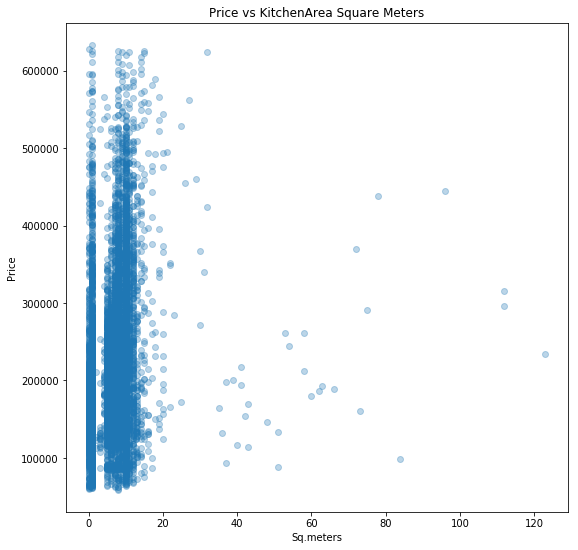

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.KitchenSquare,df.Price, alpha = 0.3, cmap = 'Paired') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs KitchenArea Square Meters")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

## DO NOT USE KITCHENSQUARE IN THE MODEL
## DO NOT USE LIFESQUARE IN THE MODEL

Text(0,0.5,'Price')

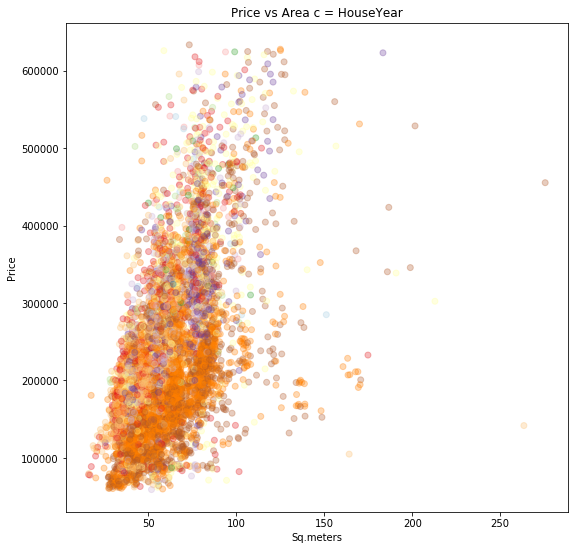

In [130]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.Square,df.Price,  c = df.HouseYear, alpha = 0.3, cmap = 'Paired') #plt.scatter(x, y....)
#plt.scatter(df,df.Price, alpha = 0.3)
plt.title("Price vs Area c = HouseYear")
plt.xlabel('Sq.meters')
plt.ylabel('Price')

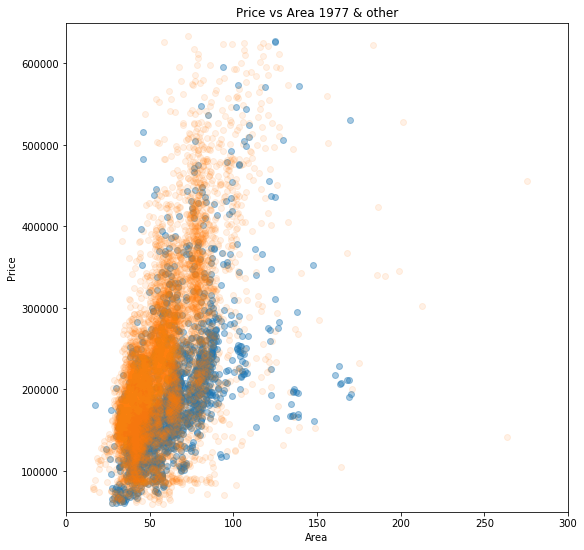

In [131]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.loc[df['HouseYear']==1977]['Square'],df.loc[df['HouseYear']==1977]['Price'], alpha = 0.4, cmap = 'Paired') 
plt.scatter(df.loc[df['HouseYear']!=1977]['Square'],df.loc[df['HouseYear']!=1977]['Price'], alpha = 0.1, cmap = 'Paired') 
plt.title("Price vs Area 1977 & other")
plt.xlabel('Area')
plt.ylabel('Price')

plt.ylim(50000,650000)
plt.xlim(0,300)

plt.savefig('Price_vs_Area_splitbyHouseYear.png')

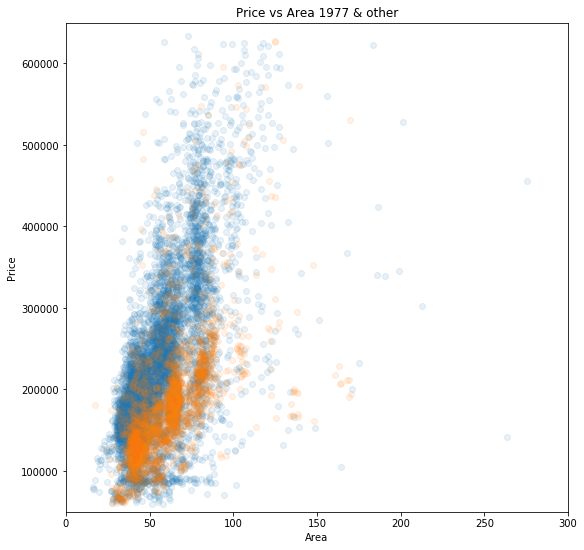

In [132]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(df.loc[df['HouseYear']!=1977]['Square'],df.loc[df['HouseYear']!=1977]['Price'], alpha = 0.1) 

plt.scatter(df.loc[df['HouseYear']==1977]['Square'],df.loc[df['HouseYear']==1977]['Price'], alpha = 0.1) 

plt.title("Price vs Area 1977 & other")
plt.xlabel('Area')
plt.ylabel('Price')

plt.ylim(50000,650000)
plt.xlim(0,300)

plt.savefig('Price_vs_Area_splitbyHouseYear.png')

#not sure if there are any trends here...or it just due to number of data points

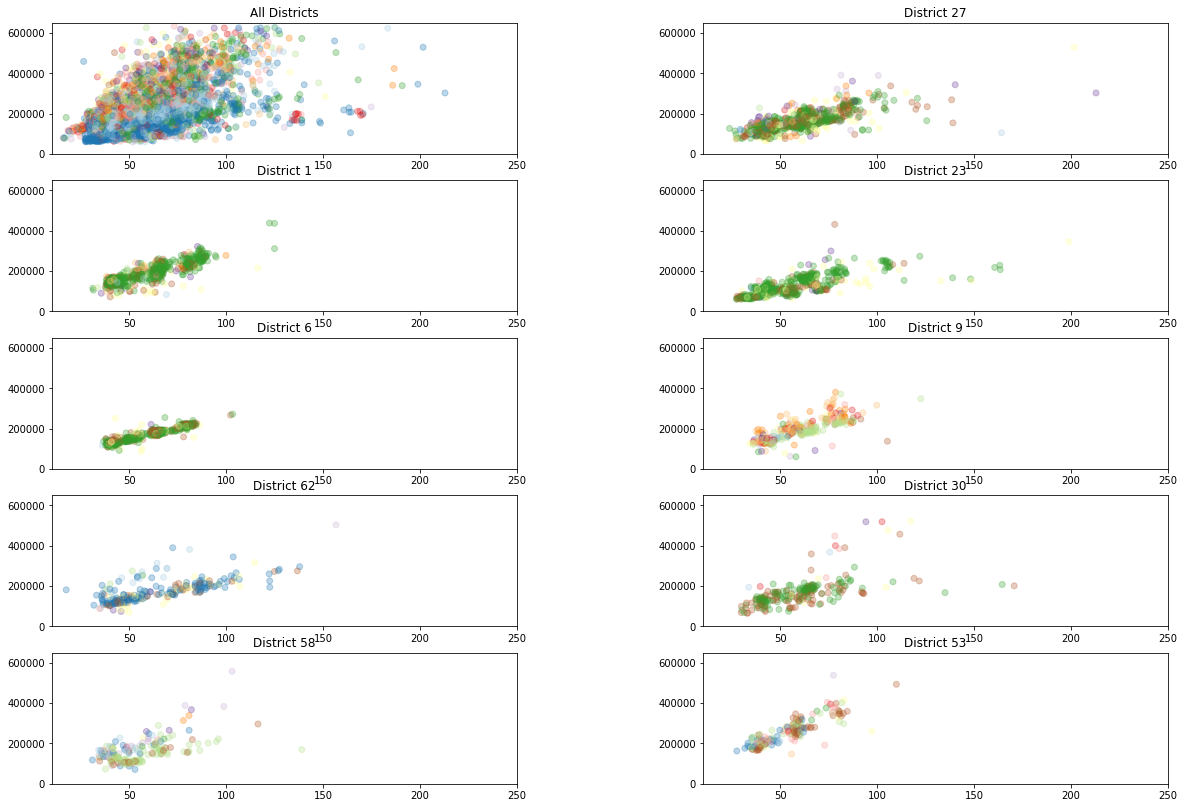

In [133]:
fig, ax = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8,ax9 = ax.flatten()

ax0.scatter(df.Square,df.Price, c = df.DistrictId, alpha = 0.3, cmap='Paired')
ax0.set_title('All Districts')
ax1.scatter(df.loc[df['DistrictId']==27]['Square'], df.loc[df['DistrictId']==27]['Price'], c = df.loc[df['DistrictId']==27]['HouseYear'],alpha = 0.3, cmap='Paired',)
ax1.set_title('District 27')
ax2.scatter(df.loc[df['DistrictId']==1]['Square'], df.loc[df['DistrictId']==1]['Price'], c = df.loc[df['DistrictId']==1]['HouseYear'],alpha = 0.3, cmap='Paired',)
ax2.set_title('District 1')
ax3.scatter(df.loc[df['DistrictId']==23]['Square'], df.loc[df['DistrictId']==23]['Price'], c = df.loc[df['DistrictId']==23]['HouseYear'], alpha = 0.3, cmap='Paired',)
ax3.set_title('District 23')
ax4.scatter(df.loc[df['DistrictId']==6]['Square'], df.loc[df['DistrictId']==6]['Price'], c = df.loc[df['DistrictId']==6]['HouseYear'], alpha = 0.3, cmap='Paired',)
ax4.set_title('District 6')
ax5.scatter(df.loc[df['DistrictId']==9]['Square'], df.loc[df['DistrictId']==9]['Price'], c = df.loc[df['DistrictId']==9]['HouseYear'],alpha = 0.3, cmap='Paired',)
ax5.set_title('District 9')
ax6.scatter(df.loc[df['DistrictId']==62]['Square'], df.loc[df['DistrictId']==62]['Price'], c = df.loc[df['DistrictId']==62]['HouseYear'],alpha = 0.3, cmap='Paired',)
ax6.set_title('District 62')
ax7.scatter(df.loc[df['DistrictId']==30]['Square'], df.loc[df['DistrictId']==30]['Price'], c = df.loc[df['DistrictId']==30]['HouseYear'],alpha = 0.3, cmap='Paired',)
ax7.set_title('District 30')
ax8.scatter(df.loc[df['DistrictId']==58]['Square'], df.loc[df['DistrictId']==58]['Price'],c = df.loc[df['DistrictId']==58]['HouseYear'], alpha = 0.3, cmap='Paired',)
ax8.set_title('District 58')
ax9.scatter(df.loc[df['DistrictId']==53]['Square'], df.loc[df['DistrictId']==53]['Price'],c = df.loc[df['DistrictId']==53]['HouseYear'], alpha = 0.3, cmap='Paired',)
ax9.set_title('District 53')

ax0.set_xlim(10,250)
ax1.set_xlim(10,250)
ax2.set_xlim(10,250)
ax3.set_xlim(10,250)
ax4.set_xlim(10,250)
ax5.set_xlim(10,250)
ax6.set_xlim(10,250)
ax7.set_xlim(10,250)
ax8.set_xlim(10,250)
ax9.set_xlim(10,250)

ax0.set_ylim(0,650000)
ax1.set_ylim(0,650000)
ax2.set_ylim(0,650000)
ax3.set_ylim(0,650000)
ax4.set_ylim(0,650000)
ax5.set_ylim(0,650000)
ax6.set_ylim(0,650000)
ax7.set_ylim(0,650000)
ax8.set_ylim(0,650000)
ax9.set_ylim(0,650000)

fig.set_size_inches(20, 14)
plt.subplots_adjust(hspace=0.2, wspace = 0.4)

In [134]:
df['HouseYear'].value_counts()

1977    2652
2017     308
2016     305
2015     299
2014     210
1970     194
1969     190
1972     178
1971     177
2018     175
1974     169
1968     163
1965     161
1963     158
1976     155
1973     150
1964     150
1975     150
1967     146
1966     140
1978     129
1962     125
1960     121
1961     113
1982     111
1981     108
1979     107
1980     107
2005     102
1983     101
        ... 
1956      15
1954      13
1953      10
1952      10
1950       7
1931       7
1935       7
1939       6
1918       5
1937       5
1933       5
1934       4
1938       4
1951       4
1940       4
1930       3
1936       3
1942       3
1919       3
1917       3
1912       2
1929       2
1932       2
1948       2
1941       2
1914       1
1947       1
1910       1
1928       1
1916       1
Name: HouseYear, Length: 95, dtype: int64

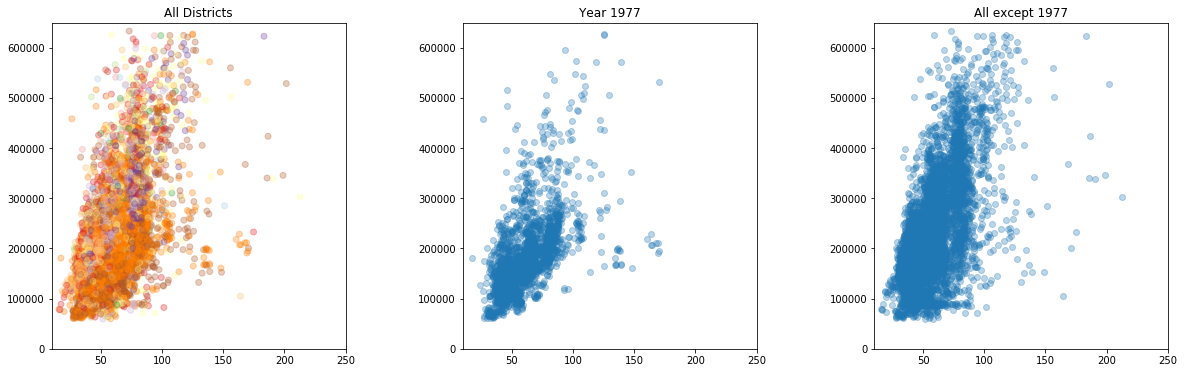

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = ax.flatten()

ax0.scatter(df.Square,df.Price, c = df.HouseYear, alpha = 0.3, cmap='Paired')
ax0.set_title('All Districts')
ax1.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], alpha = 0.3)
ax1.set_title('Year 1977')
ax2.scatter(df.loc[df['HouseYear'] != 1977]['Square'], df.loc[df['HouseYear'] !=1977]['Price'], alpha = 0.3)
ax2.set_title('All except 1977')

ax0.set_xlim(10,250)
ax1.set_xlim(10,250)
ax2.set_xlim(10,250)
ax0.set_ylim(0,650000)
ax1.set_ylim(0,650000)
ax2.set_ylim(0,650000)



fig.set_size_inches(20, 6)
plt.subplots_adjust(hspace=0.2, wspace = 0.4)

In [136]:
#there seems to be a trend in 1977 vs all others

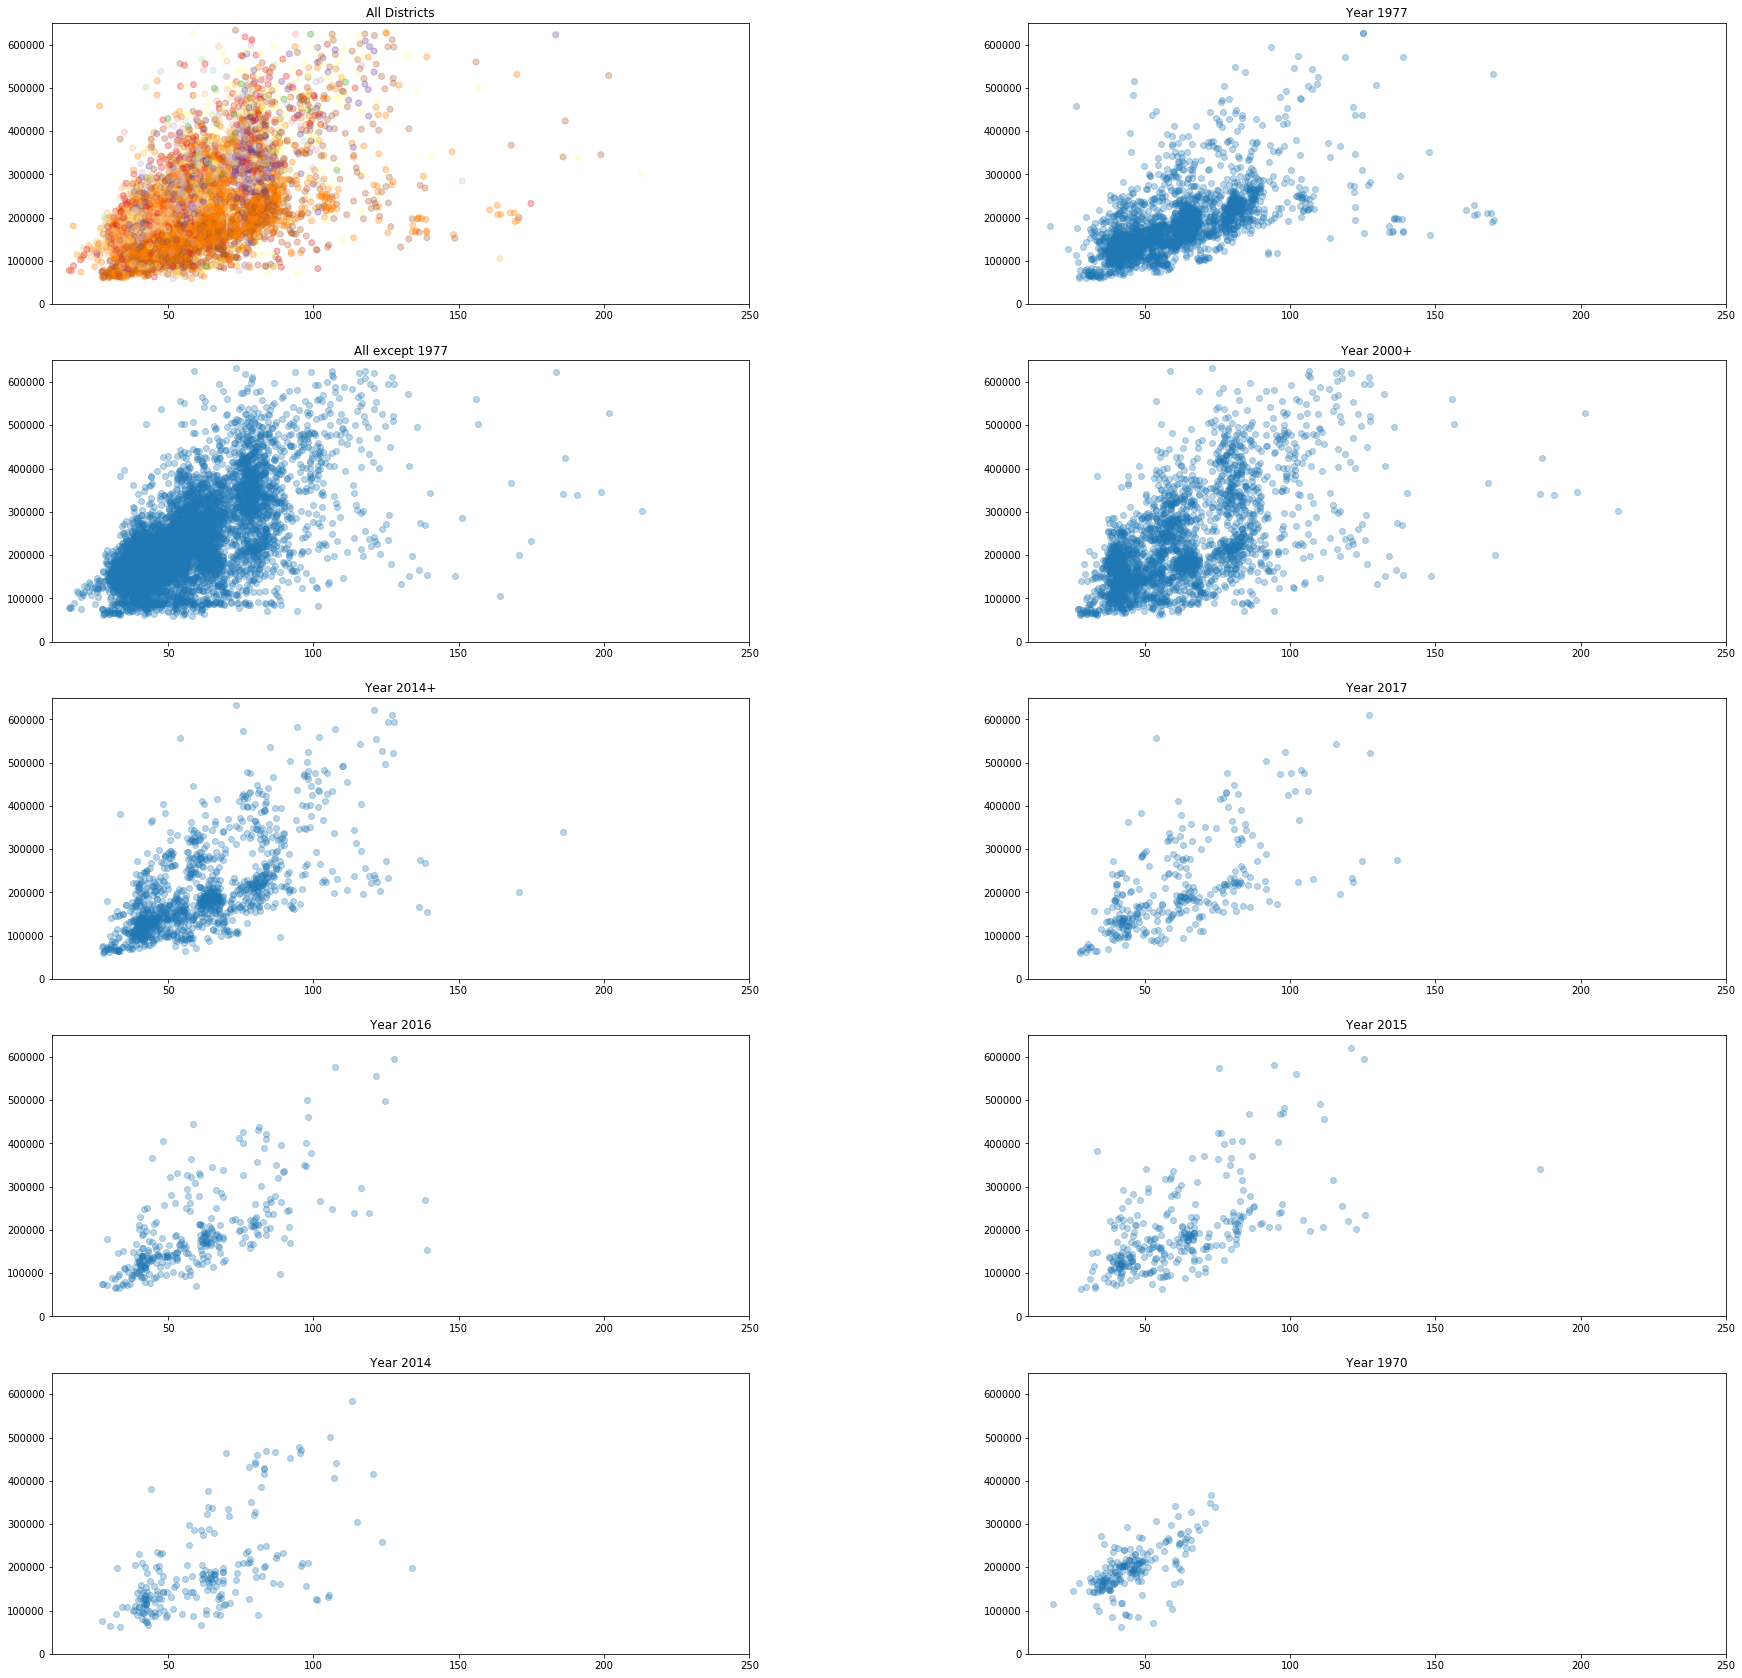

In [137]:
fig, ax = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2,ax3, ax4, ax5, ax6,ax7,ax8,ax9 = ax.flatten()

ax0.scatter(df.Square,df.Price, c = df.HouseYear, alpha = 0.3, cmap='Paired')
ax0.set_title('All Districts')
ax1.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], alpha = 0.3)
ax1.set_title('Year 1977')
ax2.scatter(df.loc[df['HouseYear'] != 1977]['Square'], df.loc[df['HouseYear'] !=1977]['Price'],  alpha = 0.3)
ax2.set_title('All except 1977')
ax3.scatter(df.loc[df['HouseYear']>2000]['Square'], df.loc[df['HouseYear']>2000]['Price'], alpha = 0.3)
ax3.set_title('Year 2000+')
ax4.scatter(df.loc[df['HouseYear']>2014]['Square'], df.loc[df['HouseYear']>2014]['Price'], alpha = 0.3)
ax4.set_title('Year 2014+')
ax5.scatter(df.loc[df['HouseYear']==2017]['Square'], df.loc[df['HouseYear']==2017]['Price'], alpha = 0.3)
ax5.set_title('Year 2017')
ax6.scatter(df.loc[df['HouseYear']==2016]['Square'], df.loc[df['HouseYear']==2016]['Price'], alpha = 0.3)
ax6.set_title('Year 2016')
ax7.scatter(df.loc[df['HouseYear']==2015]['Square'], df.loc[df['HouseYear']==2015]['Price'], alpha = 0.3)
ax7.set_title('Year 2015')
ax8.scatter(df.loc[df['HouseYear']==2014]['Square'], df.loc[df['HouseYear']==2014]['Price'], alpha = 0.3)
ax8.set_title('Year 2014')
ax9.scatter(df.loc[df['HouseYear']==1970]['Square'], df.loc[df['HouseYear']==1970]['Price'], alpha = 0.3)
ax9.set_title('Year 1970')

ax0.set_xlim(10,250)
ax1.set_xlim(10,250)
ax2.set_xlim(10,250)
ax3.set_xlim(10,250)
ax4.set_xlim(10,250)
ax5.set_xlim(10,250)
ax6.set_xlim(10,250)
ax7.set_xlim(10,250)
ax8.set_xlim(10,250)
ax9.set_xlim(10,250)

ax0.set_ylim(0,650000)
ax1.set_ylim(0,650000)
ax2.set_ylim(0,650000)
ax3.set_ylim(0,650000)
ax4.set_ylim(0,650000)
ax5.set_ylim(0,650000)
ax6.set_ylim(0,650000)
ax7.set_ylim(0,650000)
ax8.set_ylim(0,650000)
ax9.set_ylim(0,650000)



fig.set_size_inches(30, 30)
plt.subplots_adjust(hspace=0.2, wspace = 0.4)

In [138]:
df.loc[:,'Price'].sort_values(ascending = False)

6794    633233.466570
8143    627525.072788
1537    625820.041178
4764    625678.644994
3228    624680.099059
5494    624549.354546
8501    624156.003381
9650    624008.535763
4487    622888.825328
5743    621002.912679
6763    620399.280325
9784    617749.118586
2442    616857.135464
3890    611542.063430
9828    611250.912034
3937    610557.405615
9699    608674.130507
3305    606958.937510
5890    601914.014560
2857    600903.828562
507     598541.346385
9712    597921.009105
3687    595472.790212
6457    595468.077564
4622    595348.305807
3444    595128.195352
1918    594565.299770
4343    593618.746096
1296    593452.196978
6337    589179.481171
            ...      
1184     65547.071846
7099     65410.074769
3190     65379.957345
9705     65343.643530
6973     65334.292569
5482     65167.822236
5801     65033.895299
1000     64958.983529
2067     64927.358711
2985     64530.702769
6007     64298.216337
522      63900.205590
3107     63839.101051
7787     63676.977734
4953     6

In [139]:
df['HouseYear'].value_counts()

1977    2652
2017     308
2016     305
2015     299
2014     210
1970     194
1969     190
1972     178
1971     177
2018     175
1974     169
1968     163
1965     161
1963     158
1976     155
1973     150
1964     150
1975     150
1967     146
1966     140
1978     129
1962     125
1960     121
1961     113
1982     111
1981     108
1979     107
1980     107
2005     102
1983     101
        ... 
1956      15
1954      13
1953      10
1952      10
1950       7
1931       7
1935       7
1939       6
1918       5
1937       5
1933       5
1934       4
1938       4
1951       4
1940       4
1930       3
1936       3
1942       3
1919       3
1917       3
1912       2
1929       2
1932       2
1948       2
1941       2
1914       1
1947       1
1910       1
1928       1
1916       1
Name: HouseYear, Length: 95, dtype: int64

In [140]:
# let's play with 1977 houses:

In [141]:
df.loc[df['HouseYear']==1977]['DistrictId'].value_counts()

1      473
27     420
23     395
6      323
62     132
30     127
9       99
58      82
52      82
74      57
45      41
22      36
53      26
34      26
33      19
25      16
77      16
85      14
88      14
59      12
94      12
93      12
67      12
11      10
38       9
48       9
57       7
47       7
31       7
5        6
      ... 
56       1
105      1
109      1
20       1
18       1
129      1
155      1
163      1
165      1
29       1
126      1
132      1
82       1
120      1
112      1
108      1
100      1
140      1
148      1
84       1
168      1
60       1
78       1
76       1
170      1
72       1
182      1
64       1
190      1
178      1
Name: DistrictId, Length: 101, dtype: int64

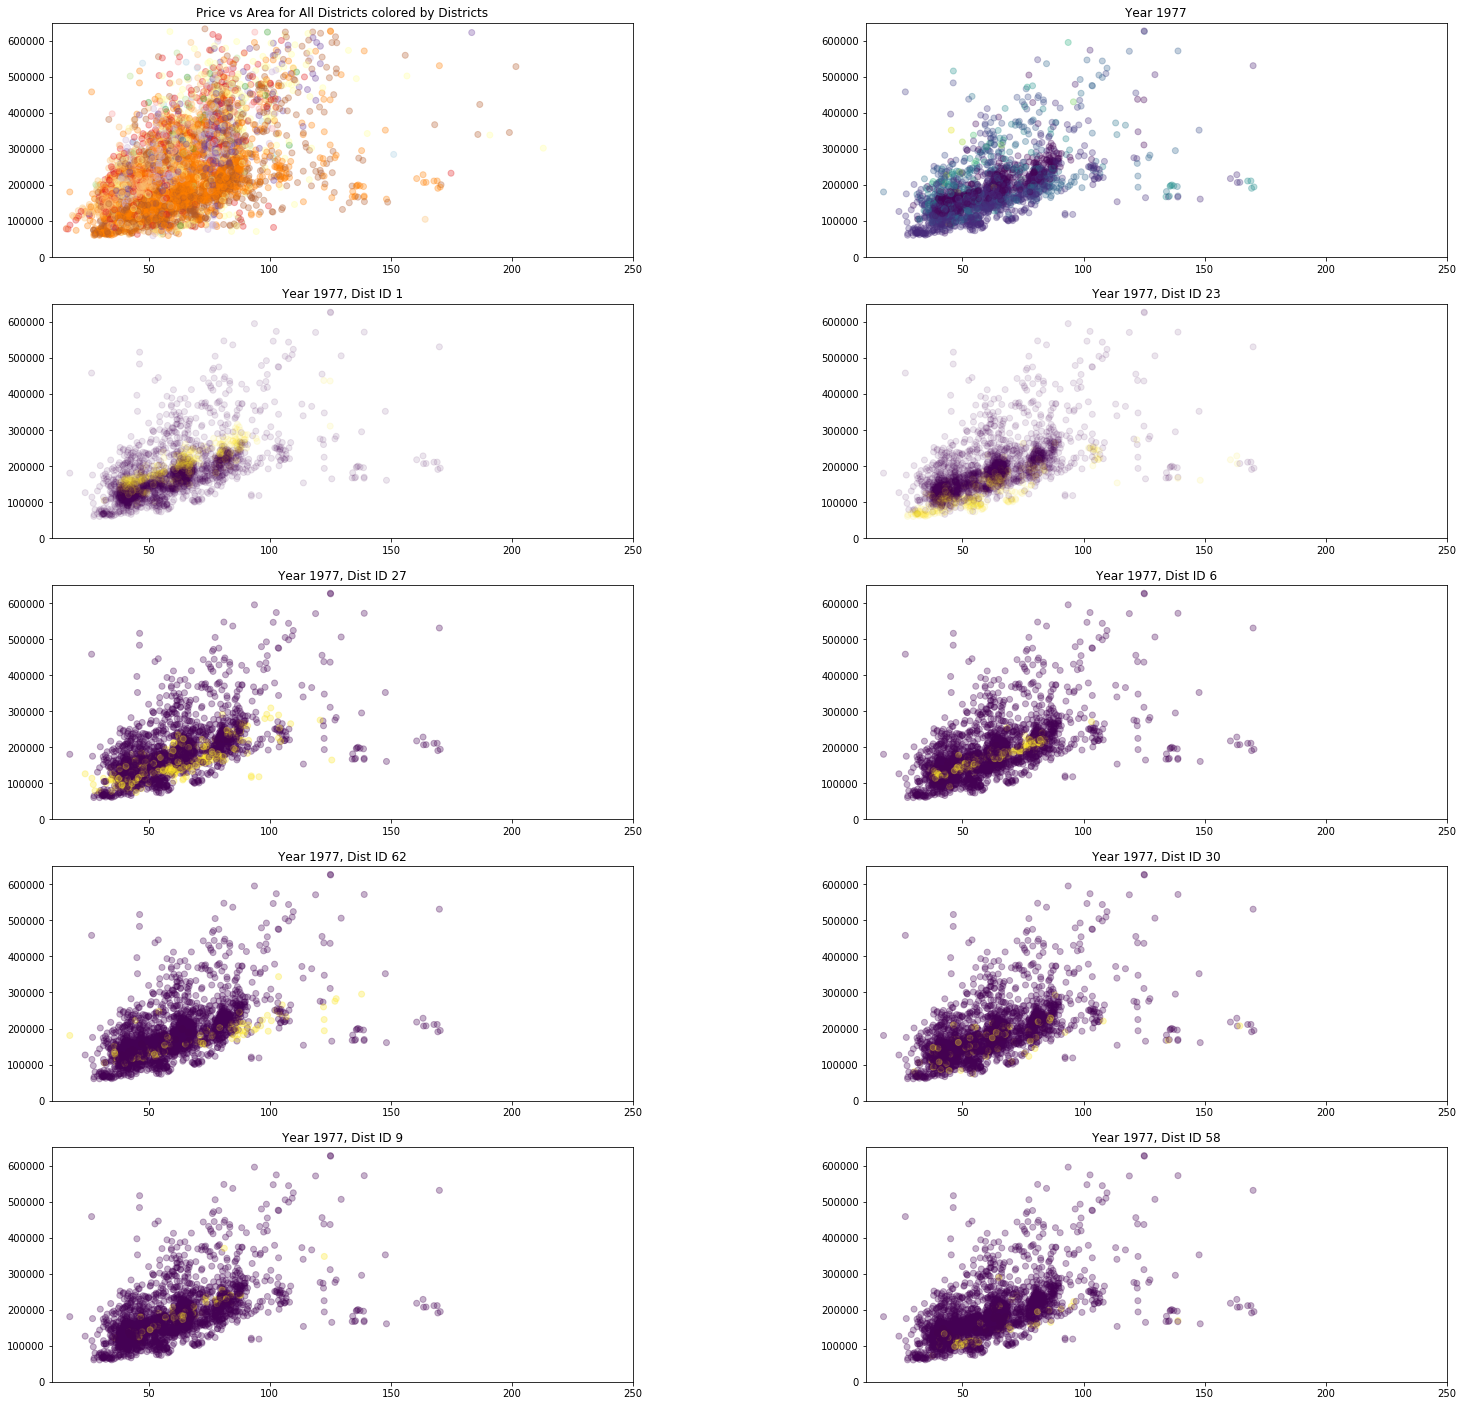

In [142]:
fig, ax = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2,ax3,ax4, ax5, ax6,ax7, ax8,ax9 = ax.flatten()

ax0.scatter(df.Square,df.Price, c = df.HouseYear, alpha = 0.3, cmap='Paired')
ax0.set_title('Price vs Area for All Districts colored by Districts')
ax1.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId'], alpha = 0.3)
ax1.set_title('Year 1977')
ax2.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==1, alpha = 0.1)
ax2.set_title('Year 1977, Dist ID 1')
ax3.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==23, alpha = 0.1)
ax3.set_title('Year 1977, Dist ID 23')
ax4.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==27, alpha = 0.3)
ax4.set_title('Year 1977, Dist ID 27')
ax5.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==6, alpha = 0.3)
ax5.set_title('Year 1977, Dist ID 6')
ax6.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==62, alpha = 0.3)
ax6.set_title('Year 1977, Dist ID 62')
ax7.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==30, alpha = 0.3)
ax7.set_title('Year 1977, Dist ID 30')
ax8.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==9, alpha = 0.3)
ax8.set_title('Year 1977, Dist ID 9')
ax9.scatter(df.loc[df['HouseYear']==1977]['Square'], df.loc[df['HouseYear']==1977]['Price'], c = df.loc[df['HouseYear']==1977]['DistrictId']==58, alpha = 0.3)
ax9.set_title('Year 1977, Dist ID 58')

ax0.set_xlim(10,250)
ax1.set_xlim(10,250)
ax2.set_xlim(10,250)
ax3.set_xlim(10,250)
ax4.set_xlim(10,250)
ax5.set_xlim(10,250)
ax6.set_xlim(10,250)
ax7.set_xlim(10,250)
ax8.set_xlim(10,250)
ax9.set_xlim(10,250)

ax0.set_ylim(0,650000)
ax1.set_ylim(0,650000)
ax2.set_ylim(0,650000)
ax3.set_ylim(0,650000)
ax4.set_ylim(0,650000)
ax5.set_ylim(0,650000)
ax6.set_ylim(0,650000)
ax7.set_ylim(0,650000)
ax8.set_ylim(0,650000)
ax9.set_ylim(0,650000)

fig.set_size_inches(25, 25)
plt.subplots_adjust(hspace=0.2, wspace = 0.4)

ML part

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [144]:
df.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [145]:
final_data = df.drop(['LifeSquare', 'KitchenSquare', 'Healthcare_1'], axis = 1)
final_data.head()

Id  DistrictId  Rooms     Square  Floor  HouseFloor  HouseYear  \
0  14038          35    2.0  47.981561      7         9.0       1969   
1  15053          41    3.0  65.683640      7         9.0       1978   
2   4765          53    2.0  44.947953      8        12.0       1968   
3   5809          58    2.0  53.352981      8        17.0       1977   
4  10783          99    1.0  39.649192     11        12.0       1976   

   Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  Helthcare_2  \
0   0.089040         B         B        33      7976         5            0   
1   0.000070         B         B        46     10309         1            1   
2   0.049637         B         B        34      7759         0            1   
3   0.437885         B         B        23      5735         3            0   
4   0.012339         B         B        35      5776         1            2   

   Shops_1 Shops_2          Price  
0       11       B  184966.930730  
1       16       B  300009.450063  
2        3       B  220925.908524  
3        5       B  175616.227217  
4        4       B  150226.531644

In [146]:
final_data['Ecology_2'].unique(), final_data['Ecology_3'].unique()

(array(['B', 'A'], dtype=object), array(['B', 'A'], dtype=object))

In [147]:
final_data['Shops_1'].unique(), final_data['Shops_2'].unique()

(array([11, 16,  3,  5,  4,  6,  2,  1,  0, 15,  7,  9,  8, 10, 19, 23],
       dtype=int64), array(['B', 'A'], dtype=object))

In [148]:
final_data['Shops_1']=final_data['Shops_1'].astype(str)

In [149]:
pd.options.display.max_columns=len(final_data.columns)+10
final_data=pd.get_dummies(final_data)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
Id             10000 non-null int64
DistrictId     10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Price          10000 non-null float64
Ecology_2_A    10000 non-null uint8
Ecology_2_B    10000 non-null uint8
Ecology_3_A    10000 non-null uint8
Ecology_3_B    10000 non-null uint8
Shops_1_0      10000 non-null uint8
Shops_1_1      10000 non-null uint8
Shops_1_10     10000 non-null uint8
Shops_1_11     10000 non-null uint8
Shops_1_15     10000 non-null uint8
Shops_1_16     10000 non-null uint8
Shops_1_19     10000 non-null uint8
Shops_1_2      100

In [150]:
data_stat1=final_data.groupby(['DistrictId','Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})

In [151]:
data_stat1

DistrictId  Rooms     mean_price
0             0    1.0  141262.601991
1             0    2.0  197998.146681
2             0    3.0  304170.518823
3             1    1.0  147186.814704
4             1    2.0  198777.278269
5             1    3.0  246262.924161
6             1    4.0  277290.705058
7             2    1.0  177871.758149
8             2    2.0  243022.112038
9             2    3.0  342699.342039
10            2    4.0  294405.899542
11            3    1.0  153218.655413
12            3    2.0  187456.411486
13            3    3.0  226063.548060
14            4    1.0  223394.796345
15            4    2.0  276510.131055
16            4    3.0  387732.800762
17            4    4.0  197302.241882
18            5    1.0  229054.825952
19            5    2.0  239138.005203
20            5    3.0  256936.970899
21            6    0.0  212864.799112
22            6    1.0  135294.171631
23            6    2.0  176346.891663
24            6    3.0  214231.902501
25            7    1.0  182312.825191
26            7    2.0  227804.653620
27            7    3.0  330174.044753
28            7    4.0  274959.672513
29            8    1.0  163015.326711
..          ...    ...            ...
644         189    3.0  335134.450010
645         190    2.0  370810.746142
646         190    3.0  547833.746502
647         191    1.0  185904.185737
648         191    2.0  313741.659045
649         191    3.0  313560.214377
650         191    4.0  405412.086233
651         192    1.0  137505.343314
652         192    2.0  206417.958924
653         193    1.0  130500.697853
654         193    2.0  181025.397125
655         193    3.0  350956.508822
656         194    2.0  224732.319843
657         194    3.0  478782.488421
658         194    4.0  319659.324785
659         195    3.0  486057.129888
660         195    5.0  479525.147323
661         196    2.0  336584.118092
662         199    3.0  432546.129741
663         200    1.0  245039.663085
664         200    2.0  244300.906533
665         200    3.0  500029.844280
666         201    1.0  341805.242387
667         201    2.0  261645.935295
668         202    2.0  502085.860162
669         202    3.0  286215.863552
670         205    1.0  220501.566180
671         207    3.0  426186.409334
672         208    2.0  431137.654083
673         209    1.0  140048.802277

[674 rows x 3 columns]

In [152]:
final_data=pd.merge(final_data,data_stat1, on=['DistrictId','Rooms'],how='left')

In [153]:
final_data.head()

Id  DistrictId  Rooms     Square  Floor  HouseFloor  HouseYear  \
0  14038          35    2.0  47.981561      7         9.0       1969   
1  15053          41    3.0  65.683640      7         9.0       1978   
2   4765          53    2.0  44.947953      8        12.0       1968   
3   5809          58    2.0  53.352981      8        17.0       1977   
4  10783          99    1.0  39.649192     11        12.0       1976   

   Ecology_1  Social_1  Social_2  Social_3  Helthcare_2          Price  \
0   0.089040        33      7976         5            0  184966.930730   
1   0.000070        46     10309         1            1  300009.450063   
2   0.049637        34      7759         0            1  220925.908524   
3   0.437885        23      5735         3            0  175616.227217   
4   0.012339        35      5776         1            2  150226.531644   

       ...        Shops_1_19  Shops_1_2  Shops_1_23  Shops_1_3  Shops_1_4  \
0      ...                 0          0           0          0          0   
1      ...                 0          0           0          0          0   
2      ...                 0          0           0          1          0   
3      ...                 0          0           0          0          0   
4      ...                 0          0           0          0          1   

   Shops_1_5  Shops_1_6  Shops_1_7  Shops_1_8  Shops_1_9  Shops_2_A  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          0          0          0          0          0   

   Shops_2_B     mean_price  
0          1  213160.076297  
1          1  303643.563728  
2          1  259938.729121  
3          1  172368.882269  
4          1  155748.415754  

[5 rows x 36 columns]

In [154]:
final_data.loc[:,['Price','mean_price']].corr()

Price  mean_price
Price       1.000000    0.803069
mean_price  0.803069    1.000000

In [155]:
final_data.head()

Id  DistrictId  Rooms     Square  Floor  HouseFloor  HouseYear  \
0  14038          35    2.0  47.981561      7         9.0       1969   
1  15053          41    3.0  65.683640      7         9.0       1978   
2   4765          53    2.0  44.947953      8        12.0       1968   
3   5809          58    2.0  53.352981      8        17.0       1977   
4  10783          99    1.0  39.649192     11        12.0       1976   

   Ecology_1  Social_1  Social_2  Social_3  Helthcare_2          Price  \
0   0.089040        33      7976         5            0  184966.930730   
1   0.000070        46     10309         1            1  300009.450063   
2   0.049637        34      7759         0            1  220925.908524   
3   0.437885        23      5735         3            0  175616.227217   
4   0.012339        35      5776         1            2  150226.531644   

       ...        Shops_1_19  Shops_1_2  Shops_1_23  Shops_1_3  Shops_1_4  \
0      ...                 0          0           0          0          0   
1      ...                 0          0           0          0          0   
2      ...                 0          0           0          1          0   
3      ...                 0          0           0          0          0   
4      ...                 0          0           0          0          1   

   Shops_1_5  Shops_1_6  Shops_1_7  Shops_1_8  Shops_1_9  Shops_2_A  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          0          0          0          0          0   

   Shops_2_B     mean_price  
0          1  213160.076297  
1          1  303643.563728  
2          1  259938.729121  
3          1  172368.882269  
4          1  155748.415754  

[5 rows x 36 columns]

## CHECK IF ROOMS IS A GOOD INDICATOR

(0, 20)

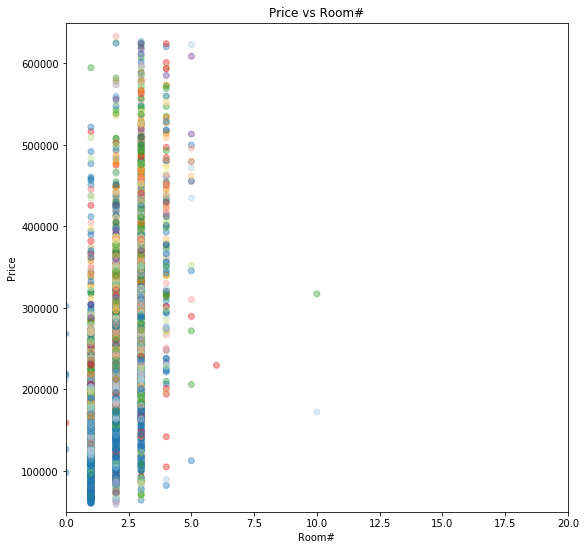

In [156]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(final_data['Rooms'],final_data['Price'], c = final_data.DistrictId, alpha = 0.4, cmap = 'Paired') 

plt.title("Price vs Room#")
plt.xlabel('Room#')
plt.ylabel('Price')

plt.ylim(50000,650000)
plt.xlim(0,20)


(-5, 210)

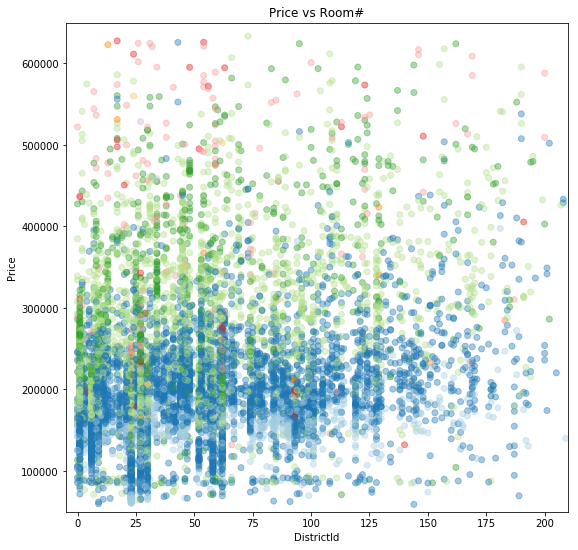

In [157]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(final_data['DistrictId'],final_data['Price'], c = final_data.Square, alpha = 0.4, cmap = 'Paired') 

plt.title("Price vs Room#")
plt.xlabel('DistrictId')
plt.ylabel('Price')

plt.ylim(50000,650000)
plt.xlim(-5,210)


In [158]:
# rooms do have some influence. let's explore

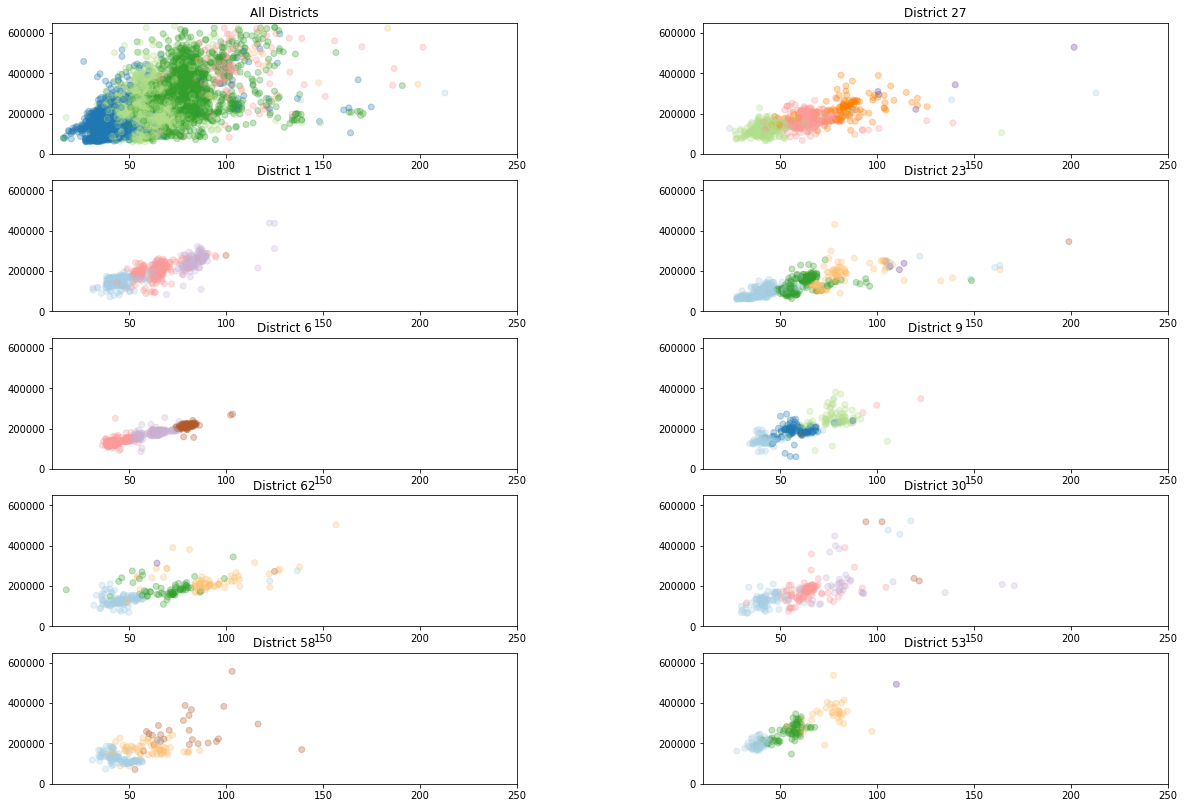

In [159]:
fig, ax = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8,ax9 = ax.flatten()

ax0.scatter(df.Square,df.Price, c = df.Rooms, alpha = 0.3, cmap='Paired')
ax0.set_title('All Districts')

ax1.scatter(df.loc[df['DistrictId']==27]['Square'], df.loc[df['DistrictId']==27]['Price'], c = df.loc[df['DistrictId']==27]['Rooms'],alpha = 0.3, cmap='Paired',)
ax1.set_title('District 27')
ax2.scatter(df.loc[df['DistrictId']==1]['Square'], df.loc[df['DistrictId']==1]['Price'], c = df.loc[df['DistrictId']==1]['Rooms'],alpha = 0.3, cmap='Paired',)
ax2.set_title('District 1')
ax3.scatter(df.loc[df['DistrictId']==23]['Square'], df.loc[df['DistrictId']==23]['Price'], c = df.loc[df['DistrictId']==23]['Rooms'], alpha = 0.3, cmap='Paired',)
ax3.set_title('District 23')
ax4.scatter(df.loc[df['DistrictId']==6]['Square'], df.loc[df['DistrictId']==6]['Price'], c = df.loc[df['DistrictId']==6]['Rooms'], alpha = 0.3, cmap='Paired',)
ax4.set_title('District 6')
ax5.scatter(df.loc[df['DistrictId']==9]['Square'], df.loc[df['DistrictId']==9]['Price'], c = df.loc[df['DistrictId']==9]['Rooms'],alpha = 0.3, cmap='Paired',)
ax5.set_title('District 9')
ax6.scatter(df.loc[df['DistrictId']==62]['Square'], df.loc[df['DistrictId']==62]['Price'], c = df.loc[df['DistrictId']==62]['Rooms'],alpha = 0.3, cmap='Paired',)
ax6.set_title('District 62')
ax7.scatter(df.loc[df['DistrictId']==30]['Square'], df.loc[df['DistrictId']==30]['Price'], c = df.loc[df['DistrictId']==30]['Rooms'],alpha = 0.3, cmap='Paired',)
ax7.set_title('District 30')
ax8.scatter(df.loc[df['DistrictId']==58]['Square'], df.loc[df['DistrictId']==58]['Price'],c = df.loc[df['DistrictId']==58]['Rooms'], alpha = 0.3, cmap='Paired',)
ax8.set_title('District 58')
ax9.scatter(df.loc[df['DistrictId']==53]['Square'], df.loc[df['DistrictId']==53]['Price'],c = df.loc[df['DistrictId']==53]['Rooms'], alpha = 0.3, cmap='Paired',)
ax9.set_title('District 53')

ax0.set_xlim(10,250)
ax1.set_xlim(10,250)
ax2.set_xlim(10,250)
ax3.set_xlim(10,250)
ax4.set_xlim(10,250)
ax5.set_xlim(10,250)
ax6.set_xlim(10,250)
ax7.set_xlim(10,250)
ax8.set_xlim(10,250)
ax9.set_xlim(10,250)

ax0.set_ylim(0,650000)
ax1.set_ylim(0,650000)
ax2.set_ylim(0,650000)
ax3.set_ylim(0,650000)
ax4.set_ylim(0,650000)
ax5.set_ylim(0,650000)
ax6.set_ylim(0,650000)
ax7.set_ylim(0,650000)
ax8.set_ylim(0,650000)
ax9.set_ylim(0,650000)

fig.set_size_inches(20, 14)
plt.subplots_adjust(hspace=0.2, wspace = 0.4)

## Indeed Rooms is a good indicator

In [160]:
final_data.describe()

Id    DistrictId         Rooms        Square         Floor  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    8383.40770     50.400800      1.888700     56.328134      8.526700   
std     4859.01902     43.587592      0.821937     19.226985      5.241148   
min        0.00000      0.000000      0.000000     15.988889      1.000000   
25%     4169.50000     20.000000      1.000000     41.881659      4.000000   
50%     8394.50000     36.000000      2.000000     52.633651      7.000000   
75%    12592.50000     75.000000      2.000000     65.985903     12.000000   
max    16798.00000    209.000000     10.000000    275.645284     42.000000   

         HouseFloor     HouseYear     Ecology_1      Social_1      Social_2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      12.609400   1984.866300      0.118858     24.687000   5352.157400   
std        6.775974     18.412271      0.119025     17.532614   4006.799803   
min        0.000000   1910.000000      0.000000      0.000000    168.000000   
25%        9.000000   1974.000000      0.017647      6.000000   1564.000000   
50%       13.000000   1977.000000      0.075424     25.000000   5285.000000   
75%       17.000000   2001.000000      0.195781     36.000000   7227.000000   
max      117.000000   2020.000000      0.521867     74.000000  19083.000000   

           Social_3   Helthcare_2          Price      ...          Shops_1_19  \
count  10000.000000  10000.000000   10000.000000      ...        10000.000000   
mean       8.039200      1.319500  214138.857399      ...            0.004900   
std       23.831875      1.493601   92872.293865      ...            0.069832   
min        0.000000      0.000000   59174.778028      ...            0.000000   
25%        0.000000      0.000000  153872.633942      ...            0.000000   
50%        2.000000      1.000000  192269.644879      ...            0.000000   
75%        5.000000      2.000000  249135.462171      ...            0.000000   
max      141.000000      6.000000  633233.466570      ...            1.000000   

          Shops_1_2    Shops_1_23     Shops_1_3     Shops_1_4     Shops_1_5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.096400      0.024500      0.071100      0.084100      0.132400   
std        0.295154      0.154603      0.257005      0.277552      0.338942   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Shops_1_6     Shops_1_7     Shops_1_8     Shops_1_9     Shops_2_A  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.048700      0.029400      0.025300      0.031600      0.082500   
std        0.215251      0.168933      0.157043      0.174941      0.275139   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Shops_2_B     mean_price  
count  10000.000000   10000.000000  
mean       0.917500  214138.857399  
std        0.275139   74582.822492  
min        0.000000   82342.775873  
25%        1.000000  166014.055413  
50%        1.000000  198777.278269  
75%        1.000000  248821.481005  
max        1.000000  624156.003381  

[8 rows x 36 columns]

In [161]:
final_data.loc[df['Rooms'] == 0]

Id  DistrictId  Rooms      Square  Floor  HouseFloor  HouseYear  \
1397  12638          27    0.0  138.427694      4         3.0       2016   
1981   7917          27    0.0  212.932361      2         3.0       2008   
2269   7317          27    0.0   41.790881     13         0.0       1977   
3911    770          28    0.0   49.483501     16         0.0       2015   
4366    456           6    0.0   81.491446      4         0.0       1977   
4853   3224          27    0.0   23.772476      1         0.0       1977   
6149   3159          88    0.0   38.697117      9        16.0       1982   
8834   9443          27    0.0   87.762616      5        15.0       1977   

      Ecology_1  Social_1  Social_2  Social_3  Helthcare_2          Price  \
1397   0.075424        11      3097         0            0  268394.744389   
1981   0.211401         9      1892         0            0  302211.260887   
2269   0.211401         9      1892         0            0   98129.976788   
3911   0.118537        30      6207         1            1  217009.338463   
4366   0.243205         5      1564         0            0  212864.799112   
4853   0.017647         2       469         0            0  126596.941798   
6149   0.127376        43      8429         3            3  158998.110646   
8834   0.211401         9      1892         0            0  219281.918007   

          ...        Shops_1_19  Shops_1_2  Shops_1_23  Shops_1_3  Shops_1_4  \
1397      ...                 0          0           0          0          0   
1981      ...                 0          0           0          0          0   
2269      ...                 0          0           0          0          0   
3911      ...                 0          0           0          0          0   
4366      ...                 0          0           0          0          0   
4853      ...                 0          0           0          0          0   
6149      ...                 0          0           0          0          0   
8834      ...                 0          0           0          0          0   

      Shops_1_5  Shops_1_6  Shops_1_7  Shops_1_8  Shops_1_9  Shops_2_A  \
1397          0          0          0          0          0          0   
1981          0          0          0          0          0          0   
2269          0          0          0          0          0          0   
3911          0          0          0          0          0          0   
4366          0          0          0          0          0          0   
4853          0          0          0          0          0          0   
6149          0          0          0          0          1          0   
8834          0          0          0          0          0          0   

      Shops_2_B     mean_price  
1397          1  202922.968374  
1981          1  202922.968374  
2269          1  202922.968374  
3911          1  217009.338463  
4366          1  212864.799112  
4853          1  202922.968374  
6149          1  158998.110646  
8834          1  202922.968374  

[8 rows x 36 columns]

In [162]:
#final_data = final_data.drop(['test_price'], axis=1)

In [163]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 36 columns):
Id             10000 non-null int64
DistrictId     10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Price          10000 non-null float64
Ecology_2_A    10000 non-null uint8
Ecology_2_B    10000 non-null uint8
Ecology_3_A    10000 non-null uint8
Ecology_3_B    10000 non-null uint8
Shops_1_0      10000 non-null uint8
Shops_1_1      10000 non-null uint8
Shops_1_10     10000 non-null uint8
Shops_1_11     10000 non-null uint8
Shops_1_15     10000 non-null uint8
Shops_1_16     10000 non-null uint8
Shops_1_19     10000 non-null uint8
Shops_1_2      100

In [164]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 36 columns):
Id             10000 non-null int64
DistrictId     10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Price          10000 non-null float64
Ecology_2_A    10000 non-null uint8
Ecology_2_B    10000 non-null uint8
Ecology_3_A    10000 non-null uint8
Ecology_3_B    10000 non-null uint8
Shops_1_0      10000 non-null uint8
Shops_1_1      10000 non-null uint8
Shops_1_10     10000 non-null uint8
Shops_1_11     10000 non-null uint8
Shops_1_15     10000 non-null uint8
Shops_1_16     10000 non-null uint8
Shops_1_19     10000 non-null uint8
Shops_1_2      100

In [165]:
final_data_to_train = final_data.drop(['DistrictId'], axis=1)

In [166]:
final_data_to_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 35 columns):
Id             10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Price          10000 non-null float64
Ecology_2_A    10000 non-null uint8
Ecology_2_B    10000 non-null uint8
Ecology_3_A    10000 non-null uint8
Ecology_3_B    10000 non-null uint8
Shops_1_0      10000 non-null uint8
Shops_1_1      10000 non-null uint8
Shops_1_10     10000 non-null uint8
Shops_1_11     10000 non-null uint8
Shops_1_15     10000 non-null uint8
Shops_1_16     10000 non-null uint8
Shops_1_19     10000 non-null uint8
Shops_1_2      10000 non-null uint8
Shops_1_23     100

In [167]:
final_data_to_train.to_pickle('final_data_to_train')

## TO REPEAT FOR TEST SET
1. drop kitchensquare, lifesquare
2. convert Ecology2,Ecology3, SHop2 to dummies
3. as str  Shops1?
4. DistrictID 

###                    NOW ML PART

## DistrictID through MeanPrice

In [168]:
target = 'Price'
y = final_data_to_train[target]
X = final_data_to_train.drop(target, axis=1)

In [169]:
X.shape,  y.shape

((10000, 34), (10000,))

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Linear


In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
lr = LinearRegression()

In [174]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
y_pred = lr.predict(X_test)

y_pred.shape

(2500,)

In [176]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

y_test         y_pred
2805  200019.013481  192843.836379
6887  452119.101374  434120.394477
554   163644.441984  190892.961562
7788  137177.199968  219210.137113
4809  297804.681892  243077.637901
139   194510.147890  204069.104787
1502  161842.794818  183184.860824
8818  114009.311152  161923.487064
608   256598.295218  236692.702697
5550   95614.137864  253124.287811

In [177]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.sort_values(by='error')

y_test         y_pred          error
8283  458378.777006  190196.729447 -268182.047559
7447  431238.467011  183582.373888 -247656.093123
4373  538574.775415  305791.034485 -232783.740930
511   518952.667244  288055.186060 -230897.481184
4764  625678.644994  398517.298091 -227161.346903
7109  578599.034510  367088.656272 -211510.378238
919   505200.880902  294866.234766 -210334.646135
3687  595472.790212  386973.718061 -208499.072151
8772  525449.074107  318606.266602 -206842.807506
8949  456417.428803  251073.947807 -205343.480997
5350  573999.459148  382222.543237 -191776.915912
7222  536367.036455  348840.330535 -187526.705920
9162  438459.651986  251975.625884 -186484.026102
3407  437025.297408  252521.626087 -184503.671322
6117  556053.820499  375412.047175 -180641.773325
4346  367865.700442  189998.815099 -177866.885344
8660  480252.222939  302627.657442 -177624.565497
3044  442173.475591  267145.546611 -175027.928980
2487  399599.702489  228300.187260 -171299.515228
9828  611250.912034  444541.897898 -166709.014136
1142  395402.960287  229095.871359 -166307.088928
5936  500488.961004  335352.141434 -165136.819570
8846  415251.354270  252461.538024 -162789.816246
8784  555661.943969  395294.863306 -160367.080663
5444  502523.573863  342182.572321 -160341.001542
286   517817.162981  359745.105223 -158072.057757
3017  402216.543361  249388.004540 -152828.538821
5743  621002.912679  468423.093903 -152579.818776
4911  338987.729829  186987.962338 -151999.767491
507   598541.346385  448628.242381 -149913.104004
...             ...            ...            ...
3651  200800.673767  353919.860788  153119.187021
9747   90971.103218  246633.290103  155662.186885
5550   95614.137864  253124.287811  157510.149947
9183  122846.815832  281358.126155  158511.310323
6412   68580.781521  227923.271561  159342.490040
6740  136963.323425  298441.863192  161478.539767
3189  104137.091918  270512.349890  166375.257972
8645  142601.394005  308983.680170  166382.286165
1867  169528.896664  340348.743971  170819.847307
221    89269.188169  261228.023109  171958.834940
5     215898.447742  387975.330910  172076.883168
3128   71291.546163  245579.015065  174287.468903
7192  120035.837550  295259.662310  175223.824760
3243  147570.429923  322866.459856  175296.029933
7089   86975.007476  268409.061361  181434.053885
8441   89697.707309  271894.368304  182196.660995
7765   91354.549251  277145.451588  185790.902337
1981  302211.260887  490349.485101  188138.224214
5087  340273.238253  529502.893502  189229.655249
6817   72435.024030  262129.943851  189694.919821
1606   84808.029433  275805.260095  190997.230662
783   129867.099213  322698.908623  192831.809410
4442   85499.969325  279119.460122  193619.490796
432    88967.921797  292799.115644  203831.193847
1167   90312.066596  295714.789084  205402.722487
5976   86299.055837  293165.103134  206866.047297
9751   85537.735405  293251.157367  207713.421963
3095  160694.584548  372135.611782  211441.027234
6007   64298.216337  280033.047730  215734.831394
1641  232766.187698  456761.127018  223994.939320

[2500 rows x 3 columns]

In [178]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

2497597283.5150685

In [179]:
from sklearn.metrics import r2_score

In [180]:
r2_score(y_test,y_pred)

0.7170984662498836

In [181]:
## проверим на переобучение

In [182]:
y_pred_train = lr.predict(X_train)

r2_score(y_train, y_pred_train)

0.7156688811704901

In [183]:
# примерно одинаковый результат. надо разобраться почему такие большие погрешности

In [184]:
pd.options.display.max_columns = 100
final_data_to_train.loc[(124844.8<final_data_to_train['Price']) & (final_data_to_train['Price']<124844.934)]

Id  Rooms      Square  Floor  HouseFloor  HouseYear  Ecology_1  \
3662  1102    3.0  101.279843     20        37.0       2014   0.006076   

      Social_1  Social_2  Social_3  Helthcare_2          Price  Ecology_2_A  \
3662        30      5285         0            6  124844.932865            0   

      Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_1_0  Shops_1_1  Shops_1_10  \
3662            1            0            1          0          0           0   

      Shops_1_11  Shops_1_15  Shops_1_16  Shops_1_19  Shops_1_2  Shops_1_23  \
3662           0           0           0           0          0           0   

      Shops_1_3  Shops_1_4  Shops_1_5  Shops_1_6  Shops_1_7  Shops_1_8  \
3662          0          0          0          1          0          0   

      Shops_1_9  Shops_2_A  Shops_2_B     mean_price  
3662          0          0          1  406272.545953

In [185]:
#mean price vse portit v etom sluchae. poprobuem sdelat get_dummies iz District ID i posm chto poluchitsa iz linear regrb

## DistrictID through Dummies


## Linear

In [186]:
final_data_DistrDummy =  final_data.drop(['mean_price'], axis=1)

In [187]:
final_data_DistrDummy['DistrictId']=final_data_DistrDummy['DistrictId'].astype(str)
final_data_DistrDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 35 columns):
Id             10000 non-null int64
DistrictId     10000 non-null object
Rooms          10000 non-null float64
Square         10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Price          10000 non-null float64
Ecology_2_A    10000 non-null uint8
Ecology_2_B    10000 non-null uint8
Ecology_3_A    10000 non-null uint8
Ecology_3_B    10000 non-null uint8
Shops_1_0      10000 non-null uint8
Shops_1_1      10000 non-null uint8
Shops_1_10     10000 non-null uint8
Shops_1_11     10000 non-null uint8
Shops_1_15     10000 non-null uint8
Shops_1_16     10000 non-null uint8
Shops_1_19     10000 non-null uint8
Shops_1_2      10

In [188]:
final_data_DistrDummy = pd.get_dummies(final_data_DistrDummy)

In [189]:
final_data_DistrDummy.head()

Id  Rooms     Square  Floor  HouseFloor  HouseYear  Ecology_1  Social_1  \
0  14038    2.0  47.981561      7         9.0       1969   0.089040        33   
1  15053    3.0  65.683640      7         9.0       1978   0.000070        46   
2   4765    2.0  44.947953      8        12.0       1968   0.049637        34   
3   5809    2.0  53.352981      8        17.0       1977   0.437885        23   
4  10783    1.0  39.649192     11        12.0       1976   0.012339        35   

   Social_2  Social_3  Helthcare_2          Price  Ecology_2_A  Ecology_2_B  \
0      7976         5            0  184966.930730            0            1   
1     10309         1            1  300009.450063            0            1   
2      7759         0            1  220925.908524            0            1   
3      5735         3            0  175616.227217            0            1   
4      5776         1            2  150226.531644            0            1   

   Ecology_3_A  Ecology_3_B  Shops_1_0  Shops_1_1  Shops_1_10  Shops_1_11  \
0            0            1          0          0           0           1   
1            0            1          0          0           0           0   
2            0            1          0          0           0           0   
3            0            1          0          0           0           0   
4            0            1          0          0           0           0   

   Shops_1_15  Shops_1_16  Shops_1_19  Shops_1_2  Shops_1_23  Shops_1_3  \
0           0           0           0          0           0          0   
1           0           1           0          0           0          0   
2           0           0           0          0           0          1   
3           0           0           0          0           0          0   
4           0           0           0          0           0          0   

   Shops_1_4  Shops_1_5  Shops_1_6  Shops_1_7  Shops_1_8  Shops_1_9  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          1          0          0          0          0   
4          1          0          0          0          0          0   

   Shops_2_A  Shops_2_B  DistrictId_0  DistrictId_1  DistrictId_10  \
0          0          1             0             0              0   
1          0          1             0             0              0   
2          0          1             0             0              0   
3          0          1             0             0              0   
4          0          1             0             0              0   

   DistrictId_100  DistrictId_101  DistrictId_102  DistrictId_103  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   DistrictId_104  DistrictId_105  DistrictId_106  DistrictId_107  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   DistrictId_108  DistrictId_109  DistrictId_11  DistrictId_110  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               0   
4               0               0              0               0   

   DistrictId_111      ...        DistrictI

In [190]:
target = 'Price'
y_DD = final_data_DistrDummy[target]
X_DD = final_data_DistrDummy.drop(target, axis=1)

In [191]:
X_DD.shape, y_DD.shape

((10000, 238), (10000,))

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_DD, y_DD, test_size=0.25)

In [193]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
y_pred = lr.predict(X_test)

y_pred.shape

(2500,)

In [195]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
})

check_test.head(20)

y_test         y_pred
8250  300585.257506  309814.695312
5550   95614.137864  244047.117188
5228  111851.660266  104351.601562
827   249831.995335  238996.429688
7042  198662.806620  215070.203125
1841  167238.283328  174178.726562
8415  380878.513736  275636.757812
3133  512797.373401  322432.992188
7166  423527.958167  326482.609375
7319  272761.715814  277717.937500
5664  250741.880610  225882.968750
2079  216385.621810  224823.351562
7459  167829.123917  209352.898438
2626   98122.316371  157451.164062
7142  269859.762462  172685.968750
2254  338317.818303  329025.578125
8730  111022.927636   90819.656250
2516   73940.595665   47326.039062
3760  378955.092550  306223.382812
7295  147017.758061  178354.804688

In [196]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

5.0695914846762795e+19

In [197]:
from sklearn.metrics import r2_score

In [198]:
r2_score(y_test,y_pred)

-5827243589.422259

In [199]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test['error'].max()

251733801487.76193

In [200]:
mse1 = (check_test["error"] ** 2).mean()

mse1

5.069591484676274e+19

## Testing using DistrictID through Area (Area Groups, mean prices)

In [201]:
#final_data = final_data.drop(['bin1'], axis=1)

In [202]:
#labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
final_data_bin = final_data
final_data_bin['bin1'] = pd.cut(final_data['Square'], [15, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220,240,260,280])
#www.reddit.com/r/learnpython/comments/73z4e2/pandas_groupby_or_cut_dataframe_to_bins/

In [203]:
final_data_bin.head()

Id  DistrictId  Rooms     Square  Floor  HouseFloor  HouseYear  \
0  14038          35    2.0  47.981561      7         9.0       1969   
1  15053          41    3.0  65.683640      7         9.0       1978   
2   4765          53    2.0  44.947953      8        12.0       1968   
3   5809          58    2.0  53.352981      8        17.0       1977   
4  10783          99    1.0  39.649192     11        12.0       1976   

   Ecology_1  Social_1  Social_2  Social_3  Helthcare_2          Price  \
0   0.089040        33      7976         5            0  184966.930730   
1   0.000070        46     10309         1            1  300009.450063   
2   0.049637        34      7759         0            1  220925.908524   
3   0.437885        23      5735         3            0  175616.227217   
4   0.012339        35      5776         1            2  150226.531644   

   Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_1_0  Shops_1_1  \
0            0            1            0            1          0          0   
1            0            1            0            1          0          0   
2            0            1            0            1          0          0   
3            0            1            0            1          0          0   
4            0            1            0            1          0          0   

   Shops_1_10  Shops_1_11  Shops_1_15  Shops_1_16  Shops_1_19  Shops_1_2  \
0           0           1           0           0           0          0   
1           0           0           0           1           0          0   
2           0           0           0           0           0          0   
3           0           0           0           0           0          0   
4           0           0           0           0           0          0   

   Shops_1_23  Shops_1_3  Shops_1_4  Shops_1_5  Shops_1_6  Shops_1_7  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          1          0          0          0          0   
3           0          0          0          1          0          0   
4           0          0          1          0          0          0   

   Shops_1_8  Shops_1_9  Shops_2_A  Shops_2_B     mean_price      bin1  
0          0          0          0          1  213160.076297  (40, 60]  
1          0          0          0          1  303643.563728  (60, 80]  
2          0          0          0          1  259938.729121  (40, 60]  
3          0          0          0          1  172368.882269  (40, 60]  
4          0          0          0          1  155748.415754  (20, 40]

In [204]:
final_data_bin['Square'].describe()

count    10000.000000
mean        56.328134
std         19.226985
min         15.988889
25%         41.881659
50%         52.633651
75%         65.985903
max        275.645284
Name: Square, dtype: float64

In [205]:
data_stat2=final_data_bin.groupby(['DistrictId','bin1'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})

In [206]:
data_stat2.head()

DistrictId       bin1     mean_price
0           0   (15, 20]   95633.769543
1           0   (20, 40]  148291.998257
2           0   (40, 60]  166194.228597
3           0   (60, 80]  257087.395693
4           0  (80, 100]  239257.502619

In [207]:
final_data_bin=pd.merge(final_data_bin,data_stat2, on=['DistrictId','bin1'],how='left')

In [208]:
final_data_bin.head()

Id  DistrictId  Rooms     Square  Floor  HouseFloor  HouseYear  \
0  14038          35    2.0  47.981561      7         9.0       1969   
1  15053          41    3.0  65.683640      7         9.0       1978   
2   4765          53    2.0  44.947953      8        12.0       1968   
3   5809          58    2.0  53.352981      8        17.0       1977   
4  10783          99    1.0  39.649192     11        12.0       1976   

   Ecology_1  Social_1  Social_2  Social_3  Helthcare_2          Price  \
0   0.089040        33      7976         5            0  184966.930730   
1   0.000070        46     10309         1            1  300009.450063   
2   0.049637        34      7759         0            1  220925.908524   
3   0.437885        23      5735         3            0  175616.227217   
4   0.012339        35      5776         1            2  150226.531644   

   Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_1_0  Shops_1_1  \
0            0            1            0            1          0          0   
1            0            1            0            1          0          0   
2            0            1            0            1          0          0   
3            0            1            0            1          0          0   
4            0            1            0            1          0          0   

   Shops_1_10  Shops_1_11  Shops_1_15  Shops_1_16  Shops_1_19  Shops_1_2  \
0           0           1           0           0           0          0   
1           0           0           0           1           0          0   
2           0           0           0           0           0          0   
3           0           0           0           0           0          0   
4           0           0           0           0           0          0   

   Shops_1_23  Shops_1_3  Shops_1_4  Shops_1_5  Shops_1_6  Shops_1_7  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          1          0          0          0          0   
3           0          0          0          1          0          0   
4           0          0          1          0          0          0   

   Shops_1_8  Shops_1_9  Shops_2_A  Shops_2_B   mean_price_x      bin1  \
0          0          0          0          1  213160.076297  (40, 60]   
1          0          0          0          1  303643.563728  (60, 80]   
2          0          0          0          1  259938.729121  (40, 60]   
3          0          0          0          1  172368.882269  (40, 60]   
4          0          0          0          1  155748.415754  (20, 40]   

    mean_price_y  
0  205779.084821  
1  277545.241711  
2  245278.513178  
3  138598.379627  
4  151804.712621

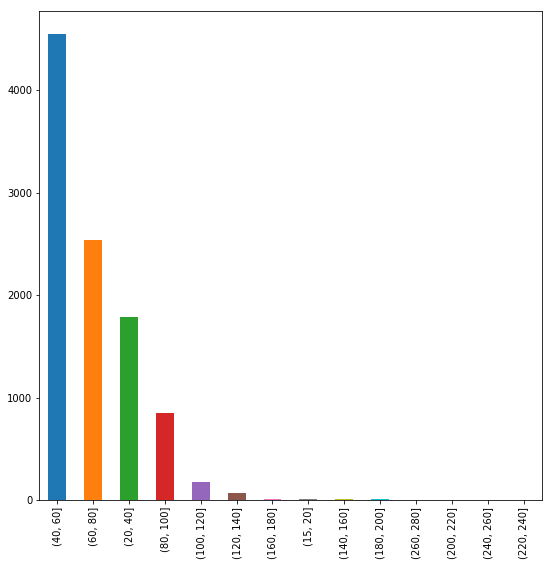

In [209]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

final_data_bin['bin1'].value_counts().plot(kind='bar')

In [210]:
final_data_bin['bin1_label']=final_data_bin['bin1'].astype(str)
final_data_bin.head()

Id  DistrictId  Rooms     Square  Floor  HouseFloor  HouseYear  \
0  14038          35    2.0  47.981561      7         9.0       1969   
1  15053          41    3.0  65.683640      7         9.0       1978   
2   4765          53    2.0  44.947953      8        12.0       1968   
3   5809          58    2.0  53.352981      8        17.0       1977   
4  10783          99    1.0  39.649192     11        12.0       1976   

   Ecology_1  Social_1  Social_2  Social_3  Helthcare_2          Price  \
0   0.089040        33      7976         5            0  184966.930730   
1   0.000070        46     10309         1            1  300009.450063   
2   0.049637        34      7759         0            1  220925.908524   
3   0.437885        23      5735         3            0  175616.227217   
4   0.012339        35      5776         1            2  150226.531644   

   Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_1_0  Shops_1_1  \
0            0            1            0            1          0          0   
1            0            1            0            1          0          0   
2            0            1            0            1          0          0   
3            0            1            0            1          0          0   
4            0            1            0            1          0          0   

   Shops_1_10  Shops_1_11  Shops_1_15  Shops_1_16  Shops_1_19  Shops_1_2  \
0           0           1           0           0           0          0   
1           0           0           0           1           0          0   
2           0           0           0           0           0          0   
3           0           0           0           0           0          0   
4           0           0           0           0           0          0   

   Shops_1_23  Shops_1_3  Shops_1_4  Shops_1_5  Shops_1_6  Shops_1_7  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          1          0          0          0          0   
3           0          0          0          1          0          0   
4           0          0          1          0          0          0   

   Shops_1_8  Shops_1_9  Shops_2_A  Shops_2_B   mean_price_x      bin1  \
0          0          0          0          1  213160.076297  (40, 60]   
1          0          0          0          1  303643.563728  (60, 80]   
2          0          0          0          1  259938.729121  (40, 60]   
3          0          0          0          1  172368.882269  (40, 60]   
4          0          0          0          1  155748.415754  (20, 40]   

    mean_price_y bin1_label  
0  205779.084821   (40, 60]  
1  277545.241711   (60, 80]  
2  245278.513178   (40, 60]  
3  138598.379627   (40, 60]  
4  151804.712621   (20, 40]

In [241]:
final_data_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 39 columns):
Id              10000 non-null int64
DistrictId      10000 non-null int64
Rooms           10000 non-null float64
Square          10000 non-null float64
Floor           10000 non-null int64
HouseFloor      10000 non-null float64
HouseYear       10000 non-null int64
Ecology_1       10000 non-null float64
Social_1        10000 non-null int64
Social_2        10000 non-null int64
Social_3        10000 non-null int64
Helthcare_2     10000 non-null int64
Price           10000 non-null float64
Ecology_2_A     10000 non-null uint8
Ecology_2_B     10000 non-null uint8
Ecology_3_A     10000 non-null uint8
Ecology_3_B     10000 non-null uint8
Shops_1_0       10000 non-null uint8
Shops_1_1       10000 non-null uint8
Shops_1_10      10000 non-null uint8
Shops_1_11      10000 non-null uint8
Shops_1_15      10000 non-null uint8
Shops_1_16      10000 non-null uint8
Shops_1_19      10000 non-null 

In [211]:
final_data_bin.to_pickle('final_data_bin.pkl')

Text(0,0.5,'mean price bins')

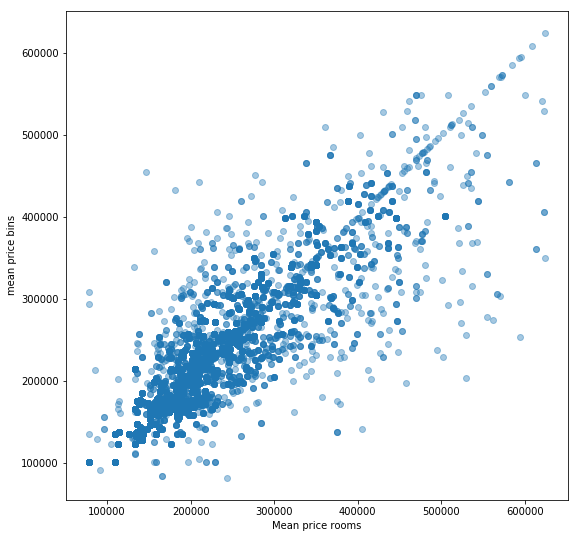

In [212]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

plt.scatter(final_data_bin['mean_price_y'],final_data_bin['mean_price_x'], alpha = 0.4, cmap = 'Paired') 

plt.xlabel('Mean price rooms')
plt.ylabel('mean price bins')


## model with both x and y mean price, and just y

In [213]:
target = 'Price'
y_bin_xy = final_data_bin[target]
X_bin_xy = final_data_bin.drop([target,'bin1', 'bin1_label'], axis=1)

In [214]:
X_bin_xy.shape, y_bin_xy.shape

((10000, 36), (10000,))

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_bin_xy, y_bin_xy, test_size=0.25)

In [216]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
y_pred = lr.predict(X_test)

y_pred.shape

(2500,)

In [218]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
})

check_test.head(20)

y_test         y_pred
1950  171280.572206  193668.631672
5661  224358.368059  173778.212902
105   241419.596872  175360.704014
6210  158711.029070  193239.656192
1220  375544.213589  349246.349964
6598  178034.514310  151691.686762
7865  159064.670936  203202.363538
1017  474801.087647  375889.173733
2614  328299.751175  227118.632369
7177  228956.204902  212006.306102
1321  142079.352820  141649.002288
160   193361.229815  162676.162516
2498  178429.675260  182897.652593
6656  197798.451315  227152.978949
4711  294050.406817  219823.197212
4052  197293.229058  234970.452714
9152  182461.593099  165773.132415
314   268170.850822  230841.467923
9041   87228.774062  224367.358661
4838  102568.349393  148031.961994

In [219]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

2082026962.975496

In [220]:
from sklearn.metrics import r2_score

In [221]:
r2_score(y_test,y_pred)

0.7661447202340763

In [222]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test['error'].max()

311705.266919578

In [223]:
mse1 = (check_test["error"] ** 2).mean()

mse1

2082026962.975493

In [224]:
## проверим на переобучение

In [225]:
y_pred_train = lr.predict(X_train)

r2_score(y_train, y_pred_train)

0.7626310077739482

In [226]:
# примерно одинаковый результат. надо разобраться почему такие большие погрешности

## check without mean_price_x

In [227]:
target = 'Price'
y_bin_x = final_data_bin[target]
X_bin_x = final_data_bin.drop([target,'bin1', 'bin1_label', 'mean_price_x'], axis=1)

In [228]:
X_bin_x.shape, y_bin_x.shape

((10000, 35), (10000,))

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_bin_x, y_bin_x, test_size=0.25)

In [230]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
y_pred = lr.predict(X_test)

y_pred.shape

(2500,)

In [232]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
})

check_test.head(20)

y_test         y_pred
2178  128758.093005  140130.343108
5337  316763.423659  344883.253651
7009  158613.118250  166081.024557
5047  343821.934744  259596.012729
1919  129512.693848  147778.541750
6026  229502.290602  190937.981347
8744  389497.840411  351937.073765
9201  117533.550253  123564.331767
5105  146159.498542  180258.785665
7043  126331.366626  132423.917905
194   159654.058378  195236.342642
8501  624156.003381  583398.773780
4938  190326.383375  202271.082859
2312  114572.119426  173430.950197
6919   88899.170321  151521.554881
8106  356777.549238  256440.285634
5413  216530.713378  247985.817935
7351  232678.341345  259808.642551
71    243479.876105  271372.128673
4135  174552.252385  140678.597980

In [233]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

2061198019.026707

In [234]:
from sklearn.metrics import r2_score

In [235]:
r2_score(y_test,y_pred)

0.7668129874296223

In [236]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test['error'].max()

283453.1741864338

In [237]:
mse1 = (check_test["error"] ** 2).mean()

mse1

2061198019.0267043

In [238]:
## проверим на переобучение

In [239]:
y_pred_train = lr.predict(X_train)

r2_score(y_train, y_pred_train)

0.7511925626270322

In [240]:
# conclusion mean_price_y (area bins) improves R2